In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns
import matsim
import os
import importlib

# Some utils modules
import utils
import pollutants

# Single type events analysis modules
import emission_events_anls as emission_anls
import shipment_events_anls as shipment_anls
import tour_events_anls as tour_anls
import travel_events_anls as travel_anls

import freight_emissions_anls as fea

# Reload after change

In [ ]:
importlib.reload(emission_anls)
importlib.reload(shipment_anls)
importlib.reload(tour_anls)
importlib.reload(travel_anls)
importlib.reload(pollutants)
importlib.reload(utils)
importlib.reload(fea)

# Check accuracy of each type analysis

## Travel events

# Plot

In [11]:
plt.rcParams["font.sans-serif"] = "Arial"

In [12]:
all_scenario_stats = fea.load_all_scenario_stats(scenario_kw_list=['basic', 'van', 'cb'], iter_list=list(range(100, 150)))
all_scenario_stats

{'basic': {'vkt': [38.968309786487794,
   42.917121921965666,
   42.34526661325546,
   41.41899739244912,
   43.48331453474134,
   44.83692465996928,
   43.643394322128614,
   40.78580227997664,
   43.71009102278002,
   38.19835239084509,
   41.20534278364399,
   43.082486082491556,
   43.39750944262589,
   40.5238163339588,
   42.71733593121805,
   37.60051447252108,
   44.83984972907593,
   41.795974493269625,
   41.0803734991828,
   43.0809248242717,
   45.217844871909975,
   42.469077188852566,
   42.302231820039005,
   41.49499548219623,
   42.82241568047752,
   42.29187213820514,
   42.17754381801256,
   42.91382078393513,
   40.25535736517159,
   43.29352149971112,
   42.30965517138442,
   41.56126077911927,
   43.82545968907191,
   41.14541227322842,
   41.80150359127407,
   43.56720676602718,
   39.603362543524085,
   40.52823061971668,
   40.86107400443464,
   43.747455427741066,
   41.59069180057161,
   41.12276038326575,
   43.029597212705426,
   41.55593914504361,
   41.88

In [13]:
all_scenario_emissions = fea.load_all_scenario_emission_stats(scenario_kw_list=['basic', 'van', 'cb'], iter_list=list(range(100, 150)))
all_scenario_emissions

{'basic': {'PM_non_exhaust': [1.142164754967348,
   1.2375385620800778,
   1.229477601639147,
   1.2074810465208836,
   1.261473779551724,
   1.30317057943149,
   1.262617642083407,
   1.1761605611679085,
   1.2682783017378716,
   1.1165407885696454,
   1.196325385223541,
   1.2581534832781307,
   1.2793162912213507,
   1.179165583214986,
   1.2297569071203618,
   1.0879414085357488,
   1.309654177612832,
   1.2116244224236024,
   1.188250032064284,
   1.250626144009404,
   1.3137590858212458,
   1.2285508301118702,
   1.2336690786081217,
   1.204608941339368,
   1.2384488589883718,
   1.2361876529455462,
   1.2256111790257005,
   1.2334273362826296,
   1.1679960813124883,
   1.255438727865566,
   1.2413805914294045,
   1.199015148184976,
   1.2855756679260095,
   1.1953056263200903,
   1.212620523167048,
   1.2696490218739325,
   1.140691643794414,
   1.1712184511826875,
   1.192063768548144,
   1.2689452832435275,
   1.2009984323729417,
   1.1984196527008597,
   1.2628940424945547,
 

## Plot utils

In [15]:
def plot_stat_comparison(
    bike_summary,
    car_summary,
    no_policy_summary,
    xlabel,
    filename=None,
    colors=["darkgrey", "steelblue", "#A5D6A7"],
    alphas=[0.8, 0.6, 0.8],
    figure_size=(10, 6),
):
    fig, ax = plt.subplots(figsize=figure_size, dpi=300)
    min_val = min(bike_summary.min(), car_summary.min(), no_policy_summary.min())
    max_val = max(bike_summary.max(), car_summary.max(), no_policy_summary.max())

    bins = np.linspace(min_val, max_val, 11)

    plt.hist(
        no_policy_summary, bins=bins, color=colors[0], alpha=alphas[0], label="Van"
    )
    plt.hist(
        car_summary,
        bins=bins,
        color=colors[1],
        alpha=alphas[1],
        label="Van-Circulation",
    )
    plt.hist(
        bike_summary,
        bins=bins,
        color=colors[2],
        alpha=alphas[2],
        label="Cargo Bike-Circulation",
    )

    # Hide the right and top spines
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)

    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.ylabel("Density", fontsize=12, fontweight="bold")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    # plt.savefig(figure_folder + filename)
    plt.show()

In [14]:
def plot_stat_comparison_two_groups(
    car_summary,
    no_policy_summary,
    xlabel,
    filename=None,
    colors=["darkgrey", "steelblue"],
    alphas=[0.8, 0.6],
    figure_size=(10, 6),
):
    fig, ax = plt.subplots(figsize=figure_size, dpi=300)
    min_val = min(car_summary.min(), no_policy_summary.min())
    max_val = max(car_summary.max(), no_policy_summary.max())

    bins = np.linspace(min_val, max_val, 11)

    plt.hist(
        no_policy_summary, bins=bins, color=colors[0], alpha=alphas[0], label="Van"
    )
    plt.hist(
        car_summary,
        bins=bins,
        color=colors[1],
        alpha=alphas[1],
        label="Van-Circulation",
    )

    # Hide the right and top spines
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)

    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.ylabel("Density", fontsize=12, fontweight="bold")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    # plt.savefig(figure_folder + filename)
    plt.show()

## Plot operational KPIs

### VKT

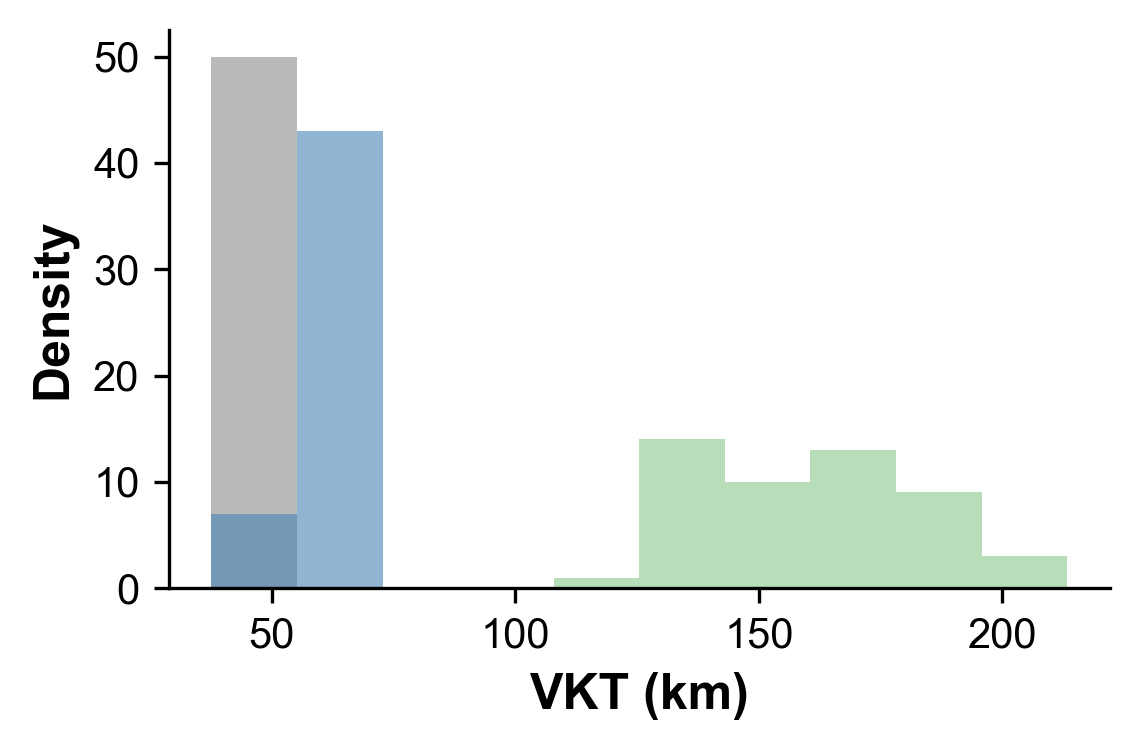

In [16]:
metric = 'vkt'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='VKT (km)',
    figure_size=(3.9, 2.6)
)

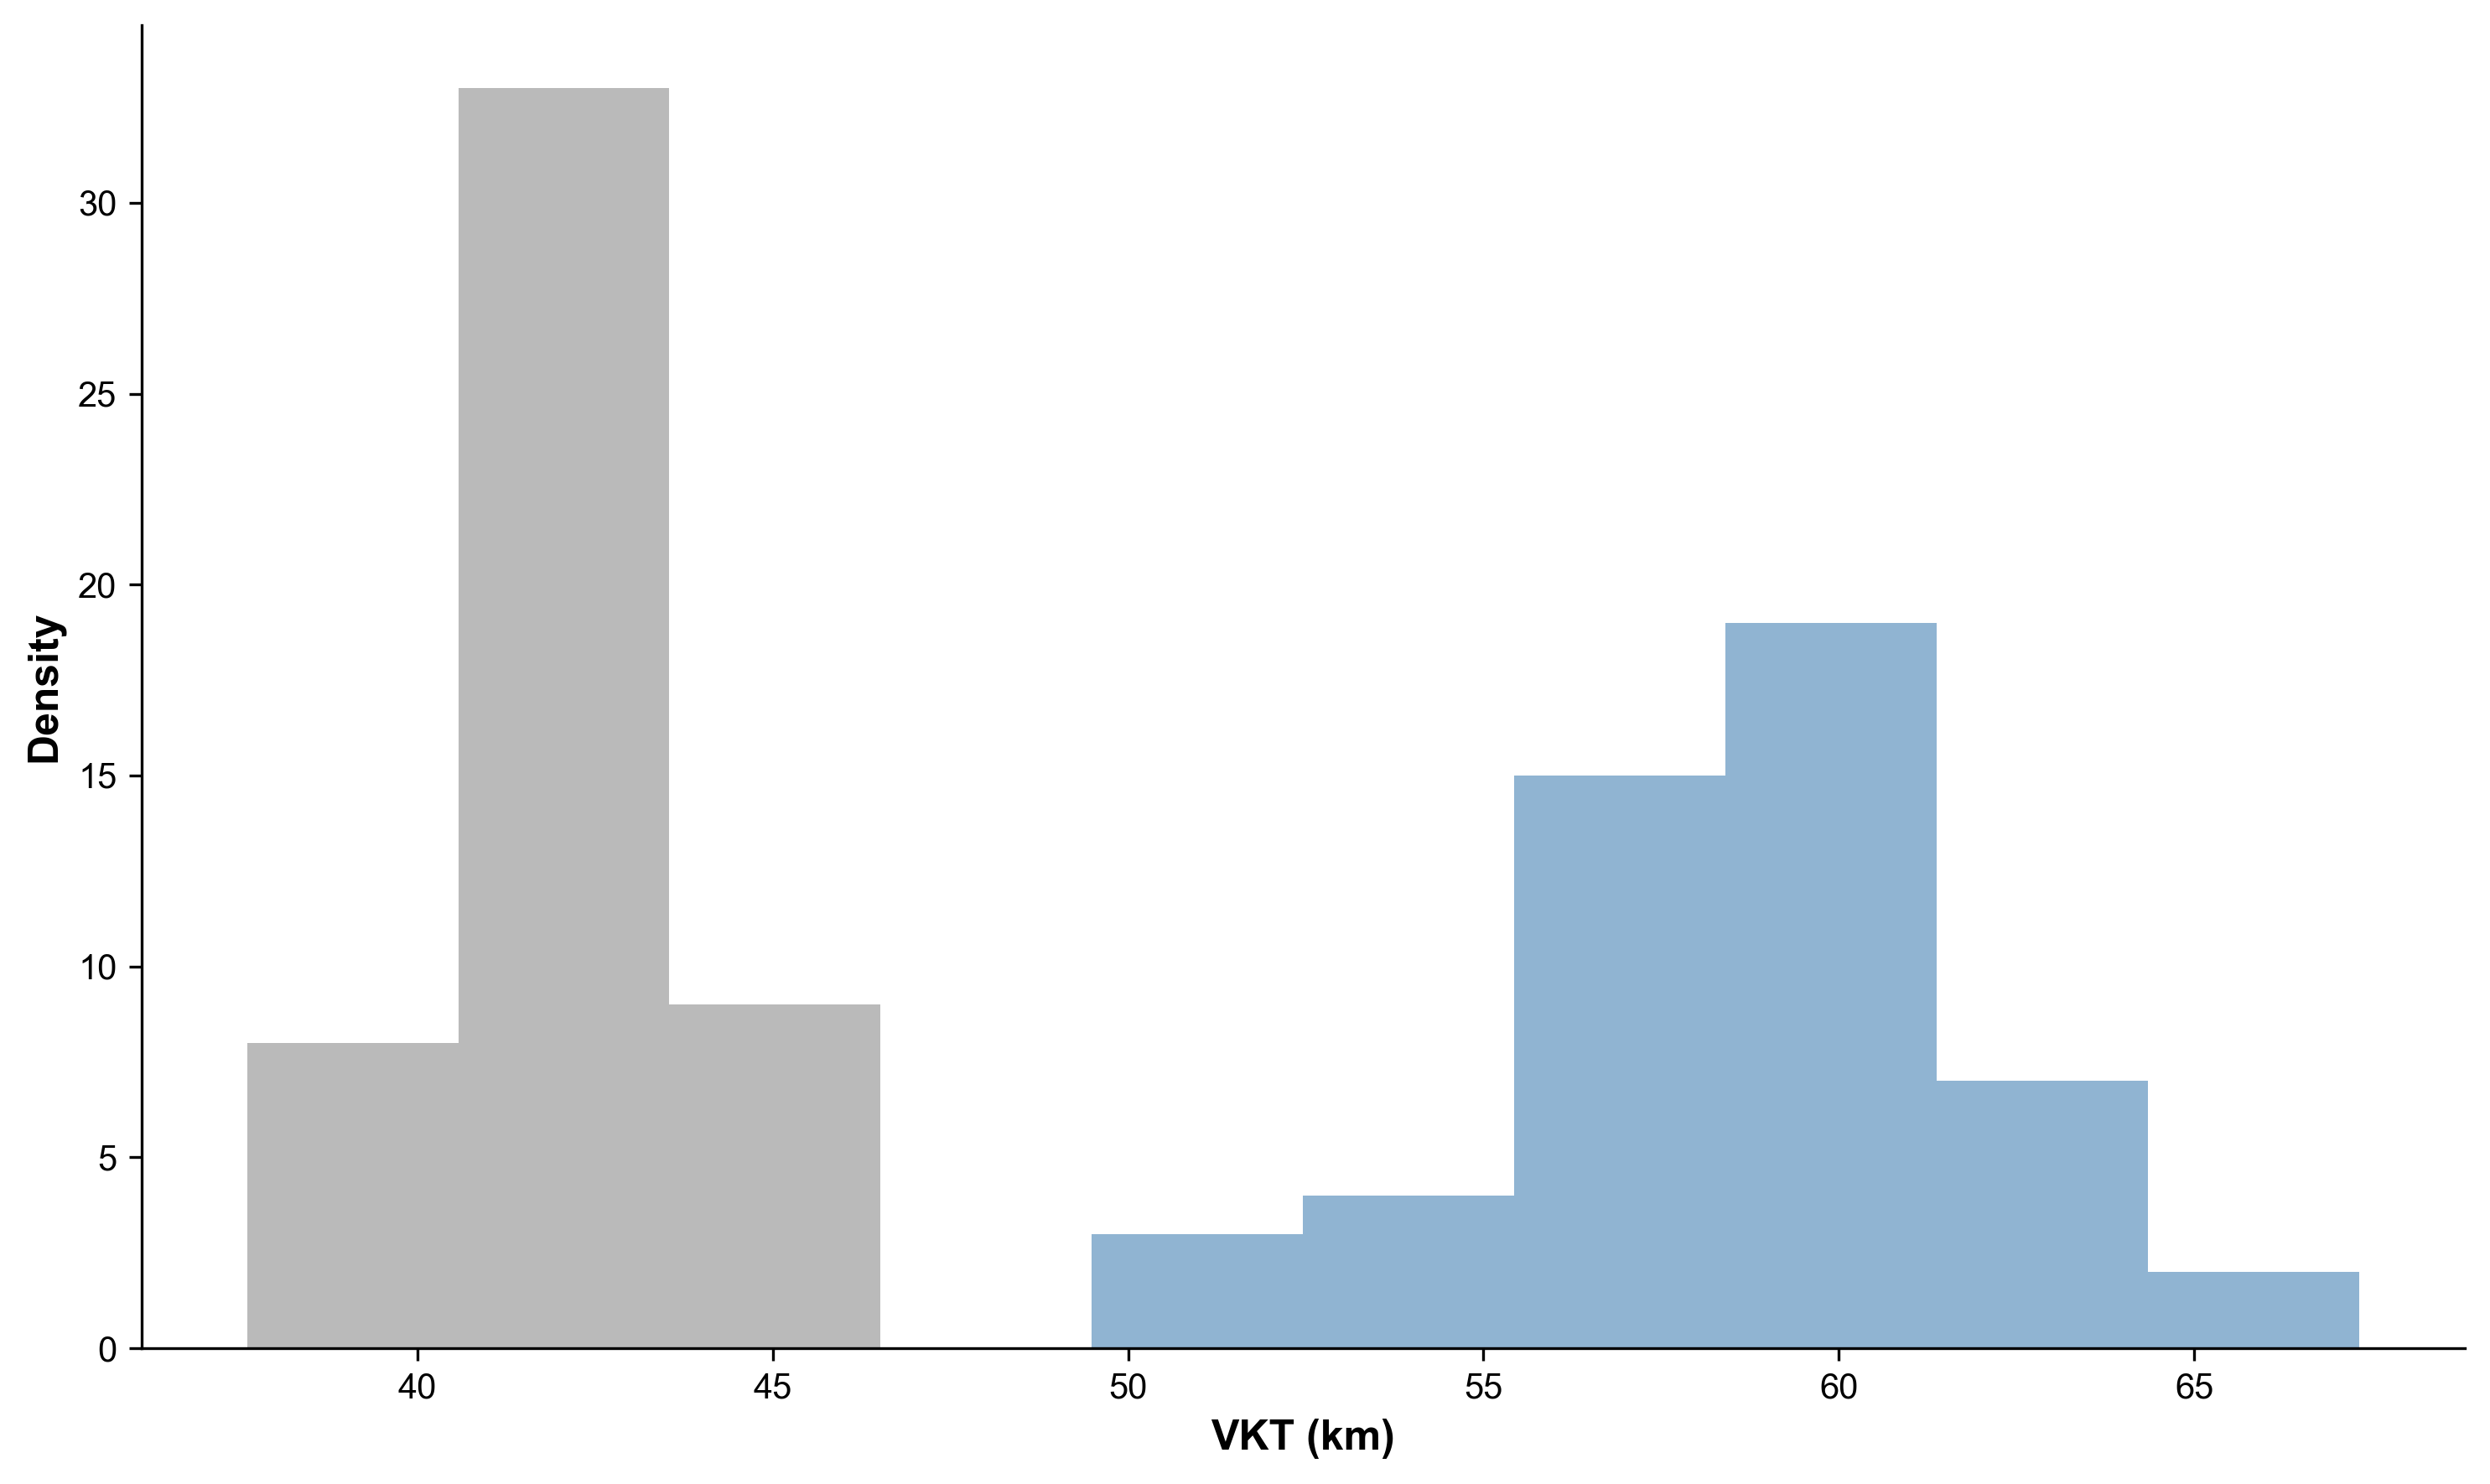

In [17]:
metric = 'vkt'
plot_stat_comparison_two_groups(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    xlabel='VKT (km)',
)

### Transit VKT

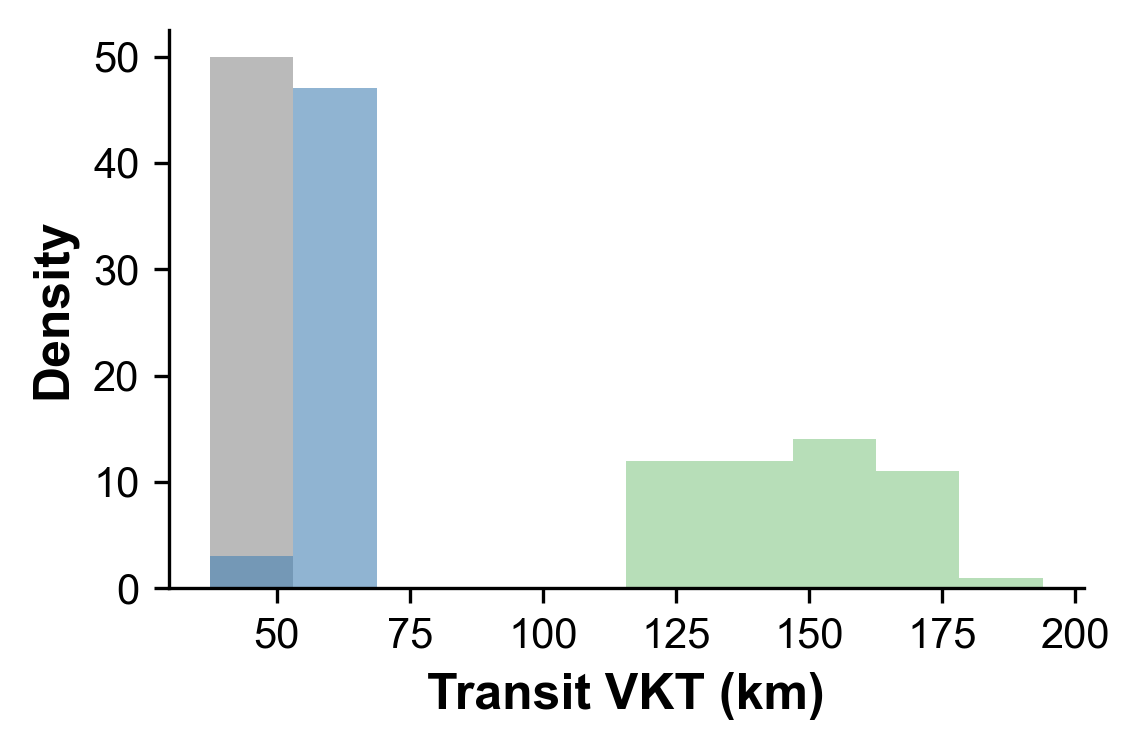

In [18]:
metric = 'transit_vkt'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='Transit VKT (km)',
    figure_size=(3.9, 2.6)
)

### Transit Time

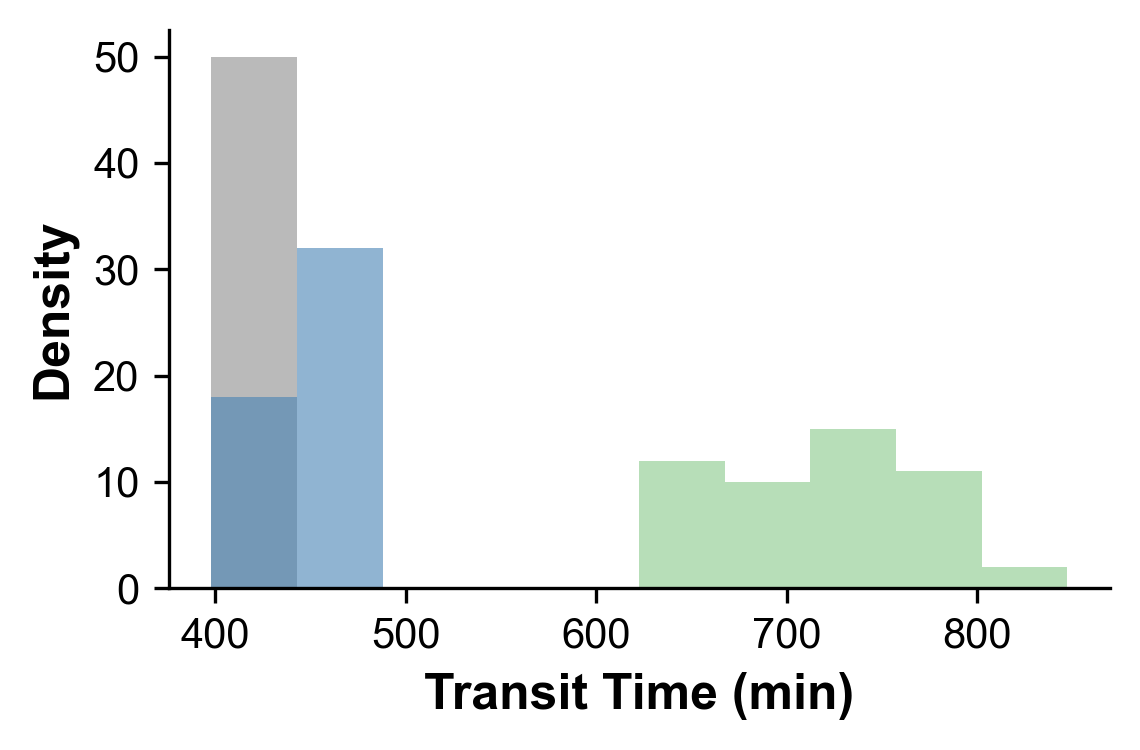

In [19]:
metric = 'total_transit_time'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='Transit Time (min)',
    figure_size=(3.9, 2.6)
)

### Ton KM Travelled

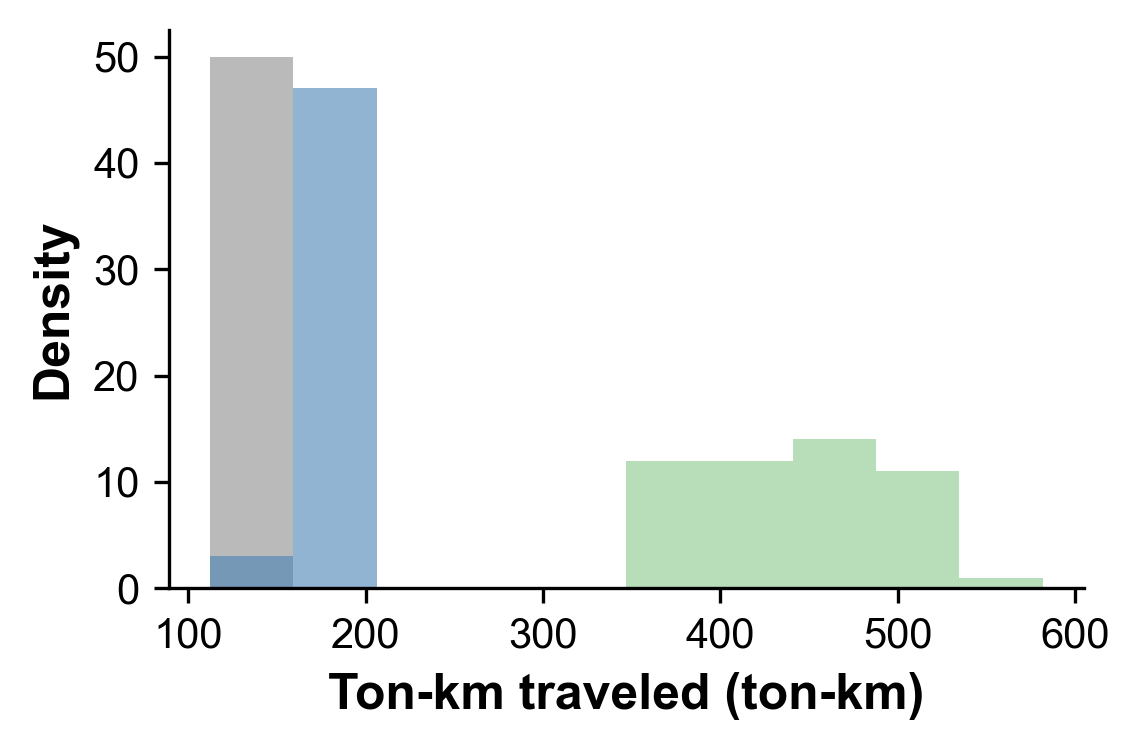

In [20]:
metric = 'ton_km_traveled'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='Ton-km traveled (ton-km)',
    figure_size=(3.9, 2.6)
)

### transit_vkt_per_ton

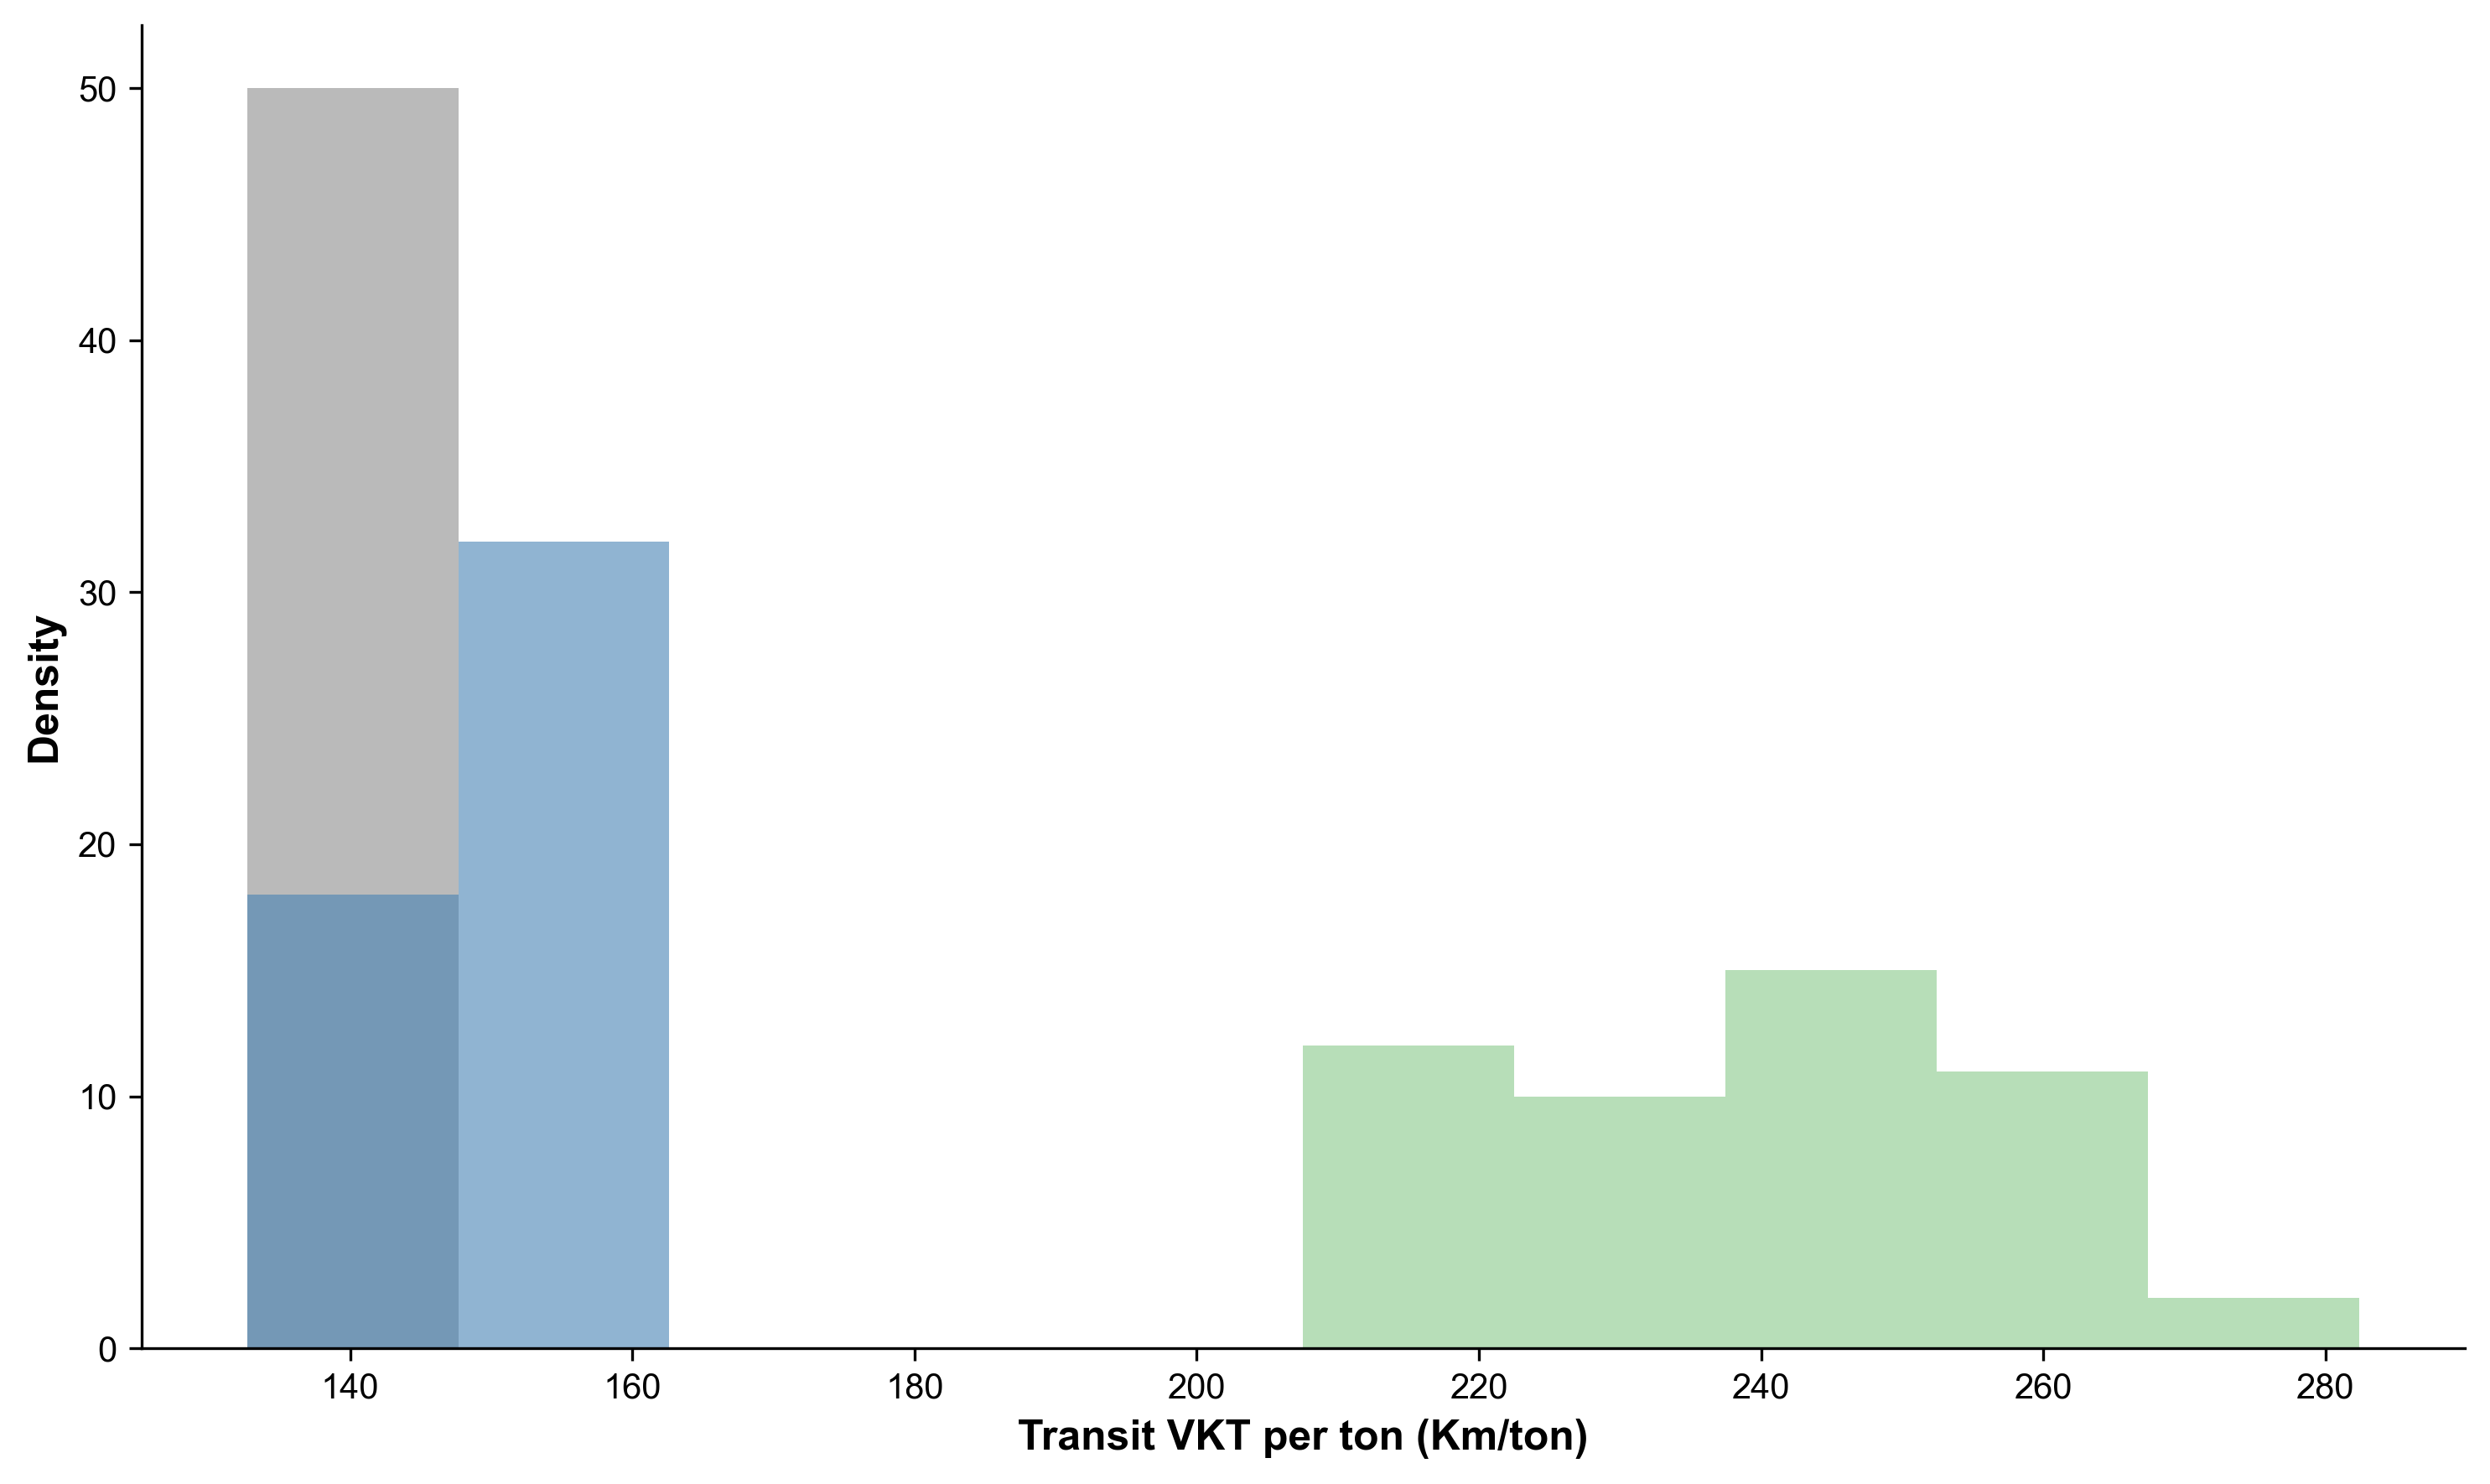

In [31]:
metric = 'transit_vkt_per_ton'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='Transit VKT per ton (Km/ton)',
)

### Transit VTT

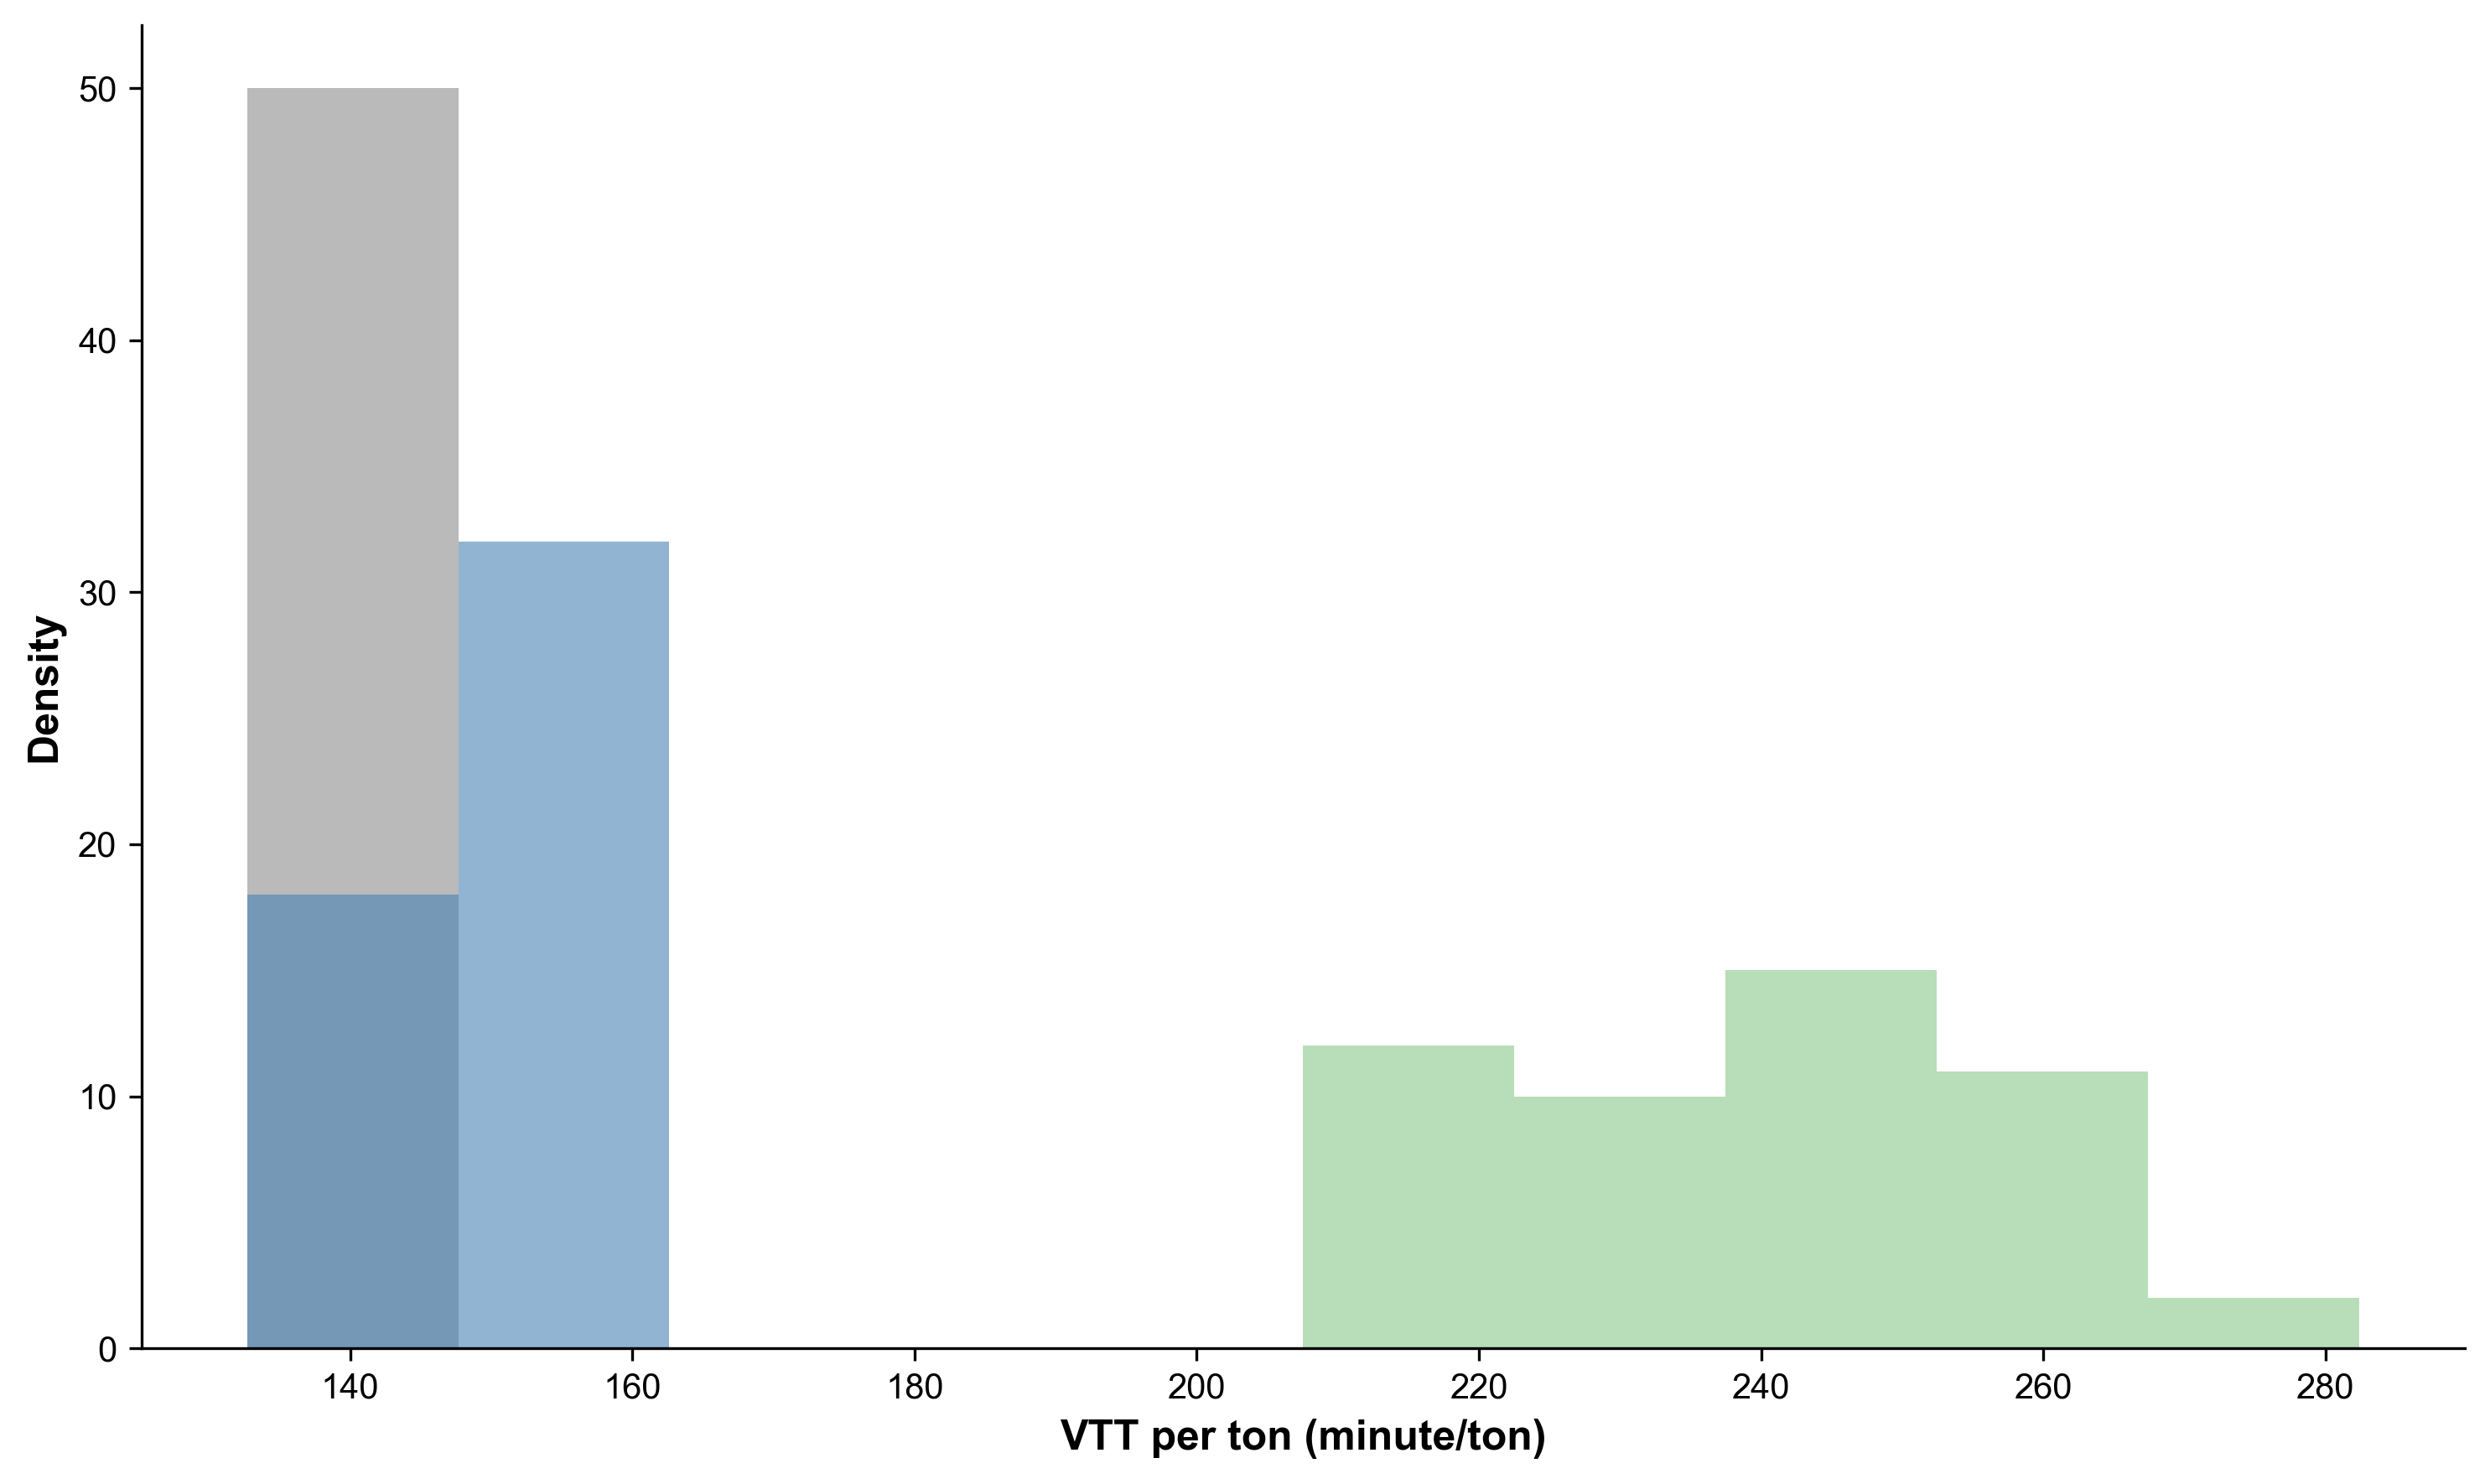

In [30]:
metric = 'transit_time_per_ton'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='VTT per ton (minute/ton)',
)

### NO of vehicles

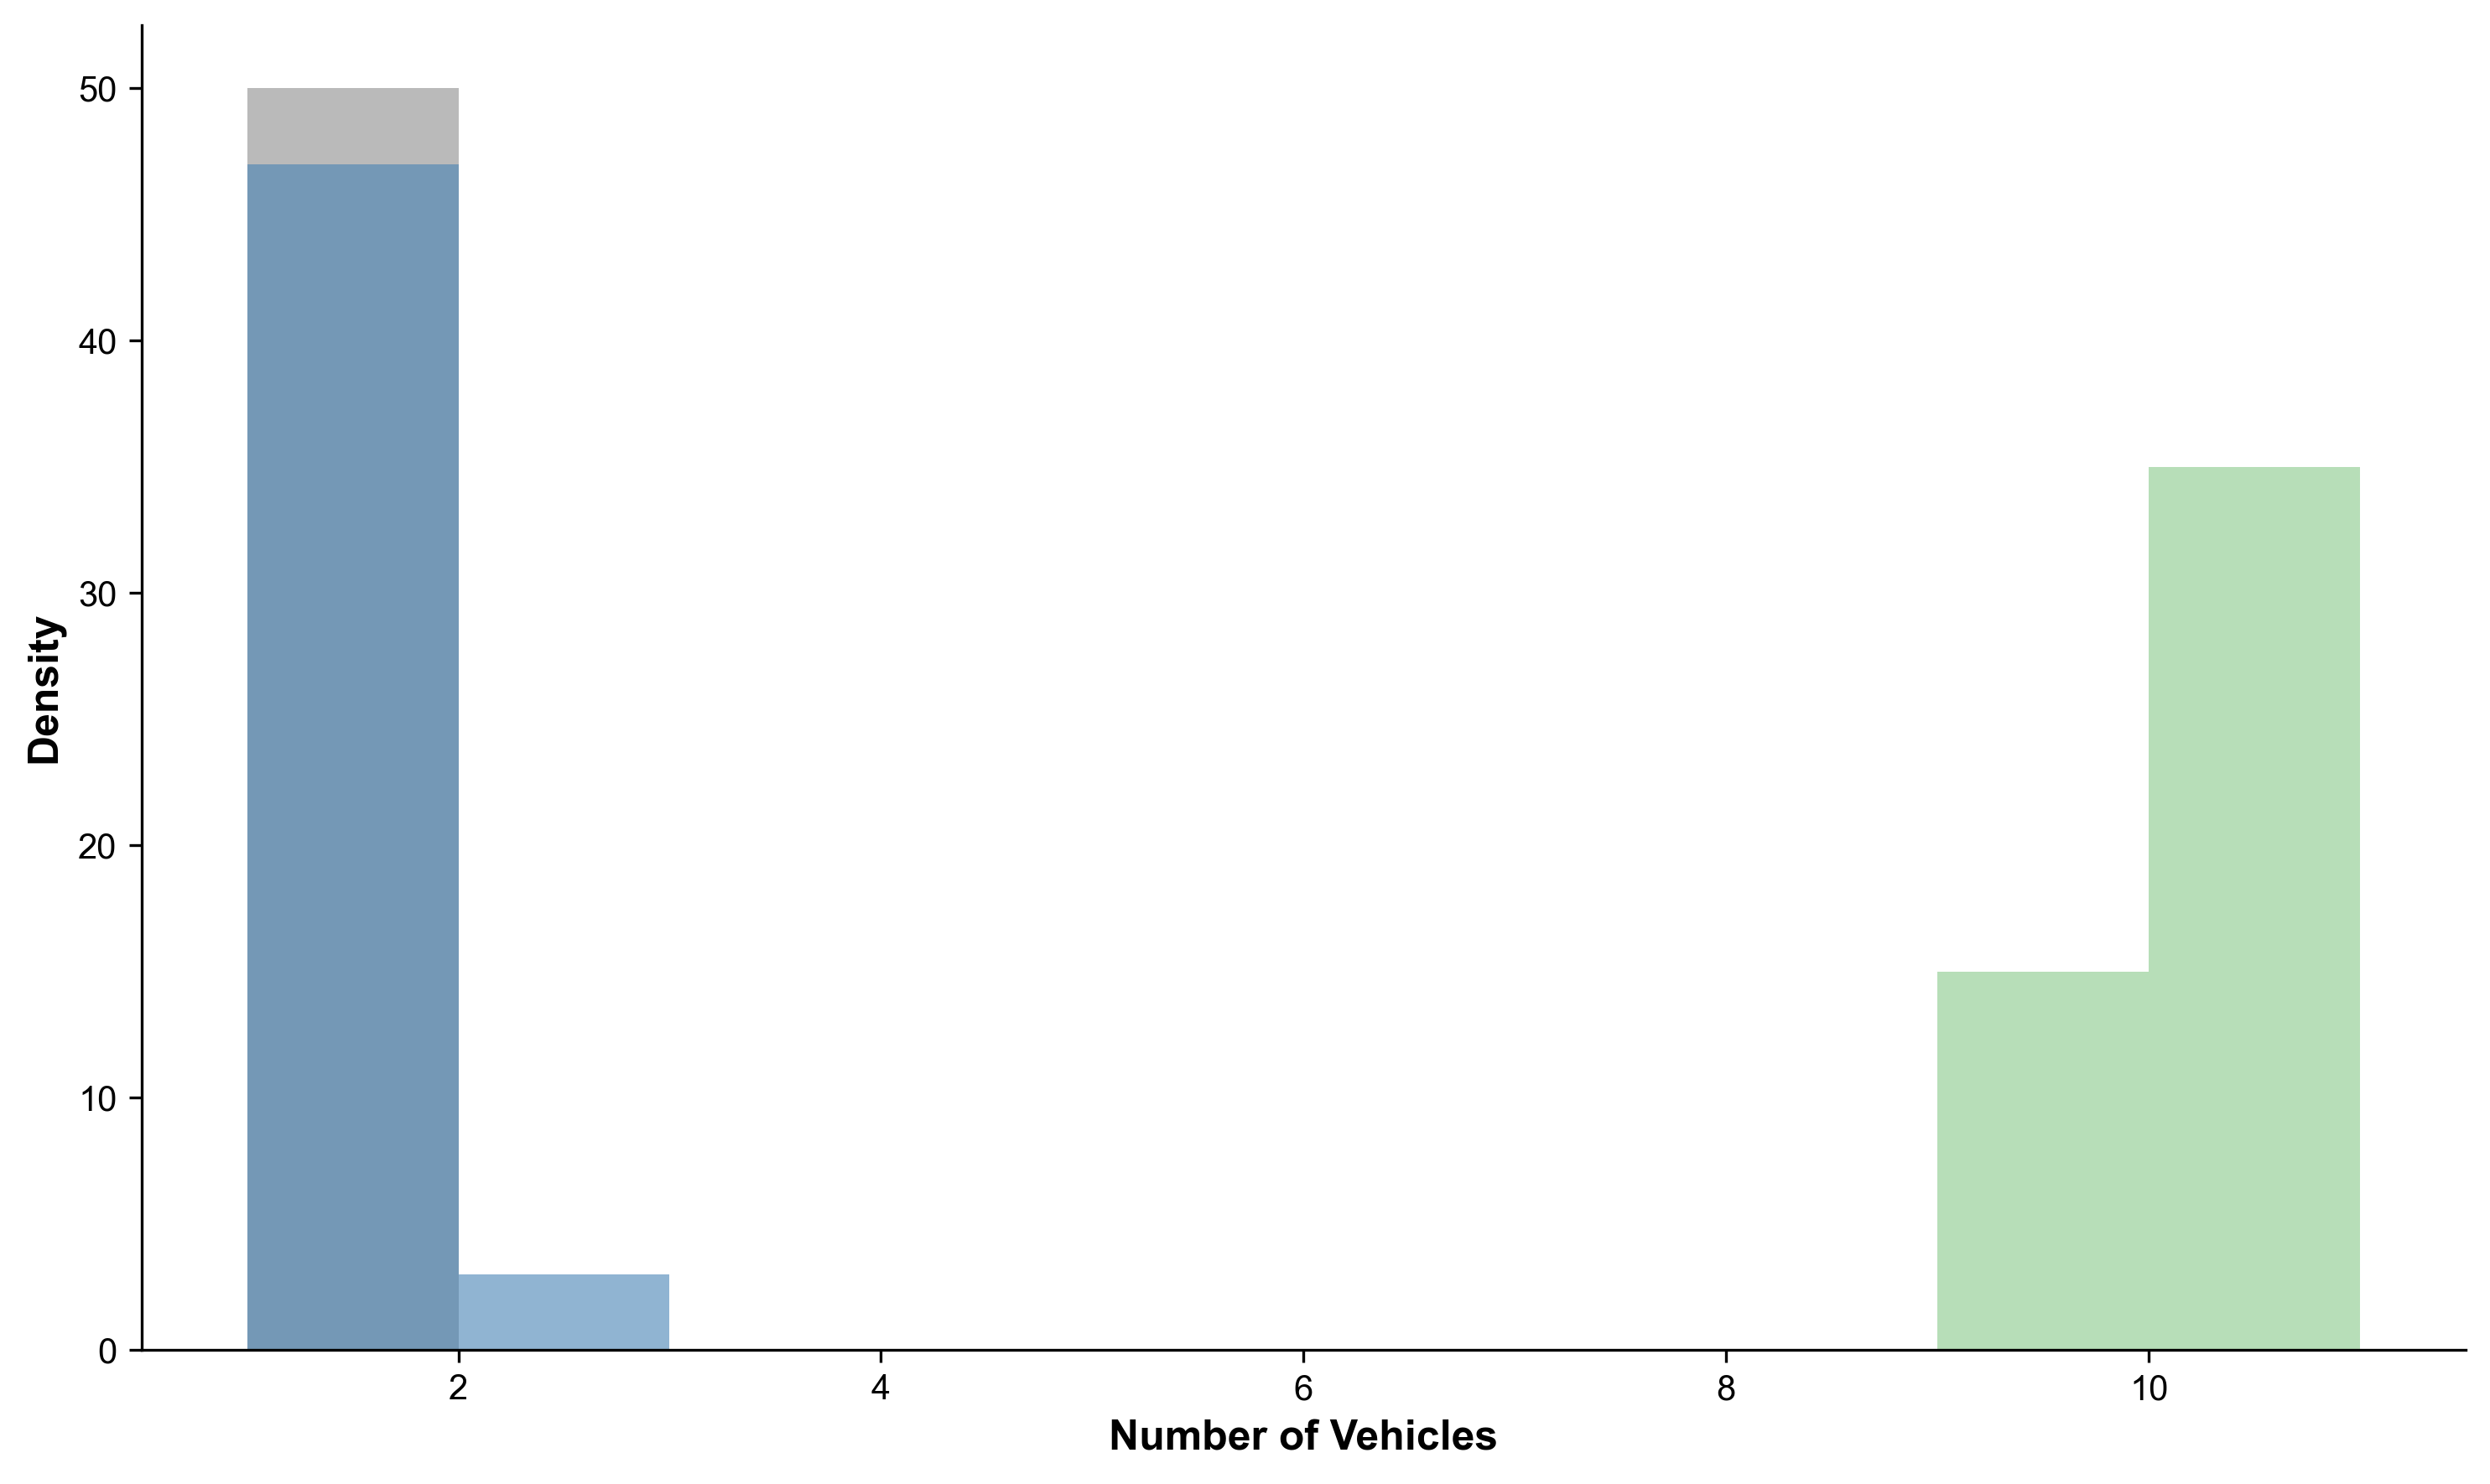

In [22]:
metric = 'number_of_vehicle'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_stats['basic'][metric]),
    car_summary=np.array(all_scenario_stats['van'][metric]),
    bike_summary=np.array(all_scenario_stats['cb'][metric]),
    xlabel='Number of Vehicles',
    
)

## Emissions

### CO2e

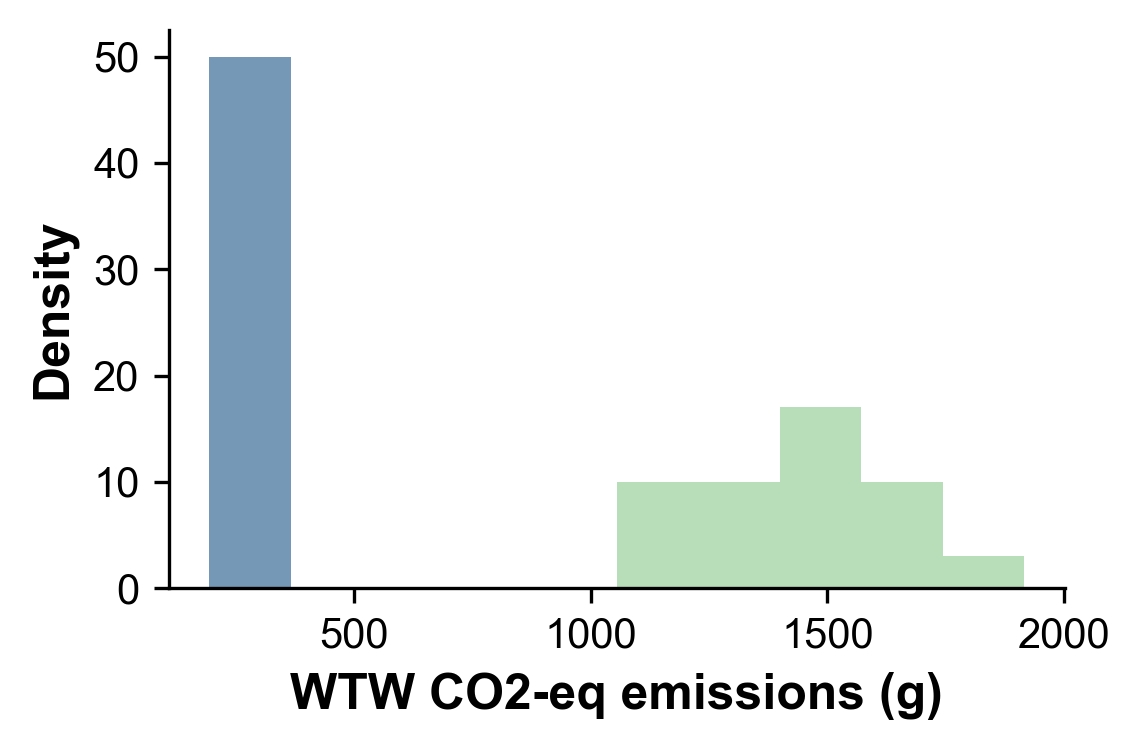

In [23]:
metric = pollutants.CO2e
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_emissions['basic'][metric]),
    car_summary=np.array(all_scenario_emissions['van'][metric]),
    bike_summary=np.array(all_scenario_emissions['cb'][metric]),
    xlabel='WTW CO2-eq emissions (g)',
    figure_size=(3.9, 2.6)
)

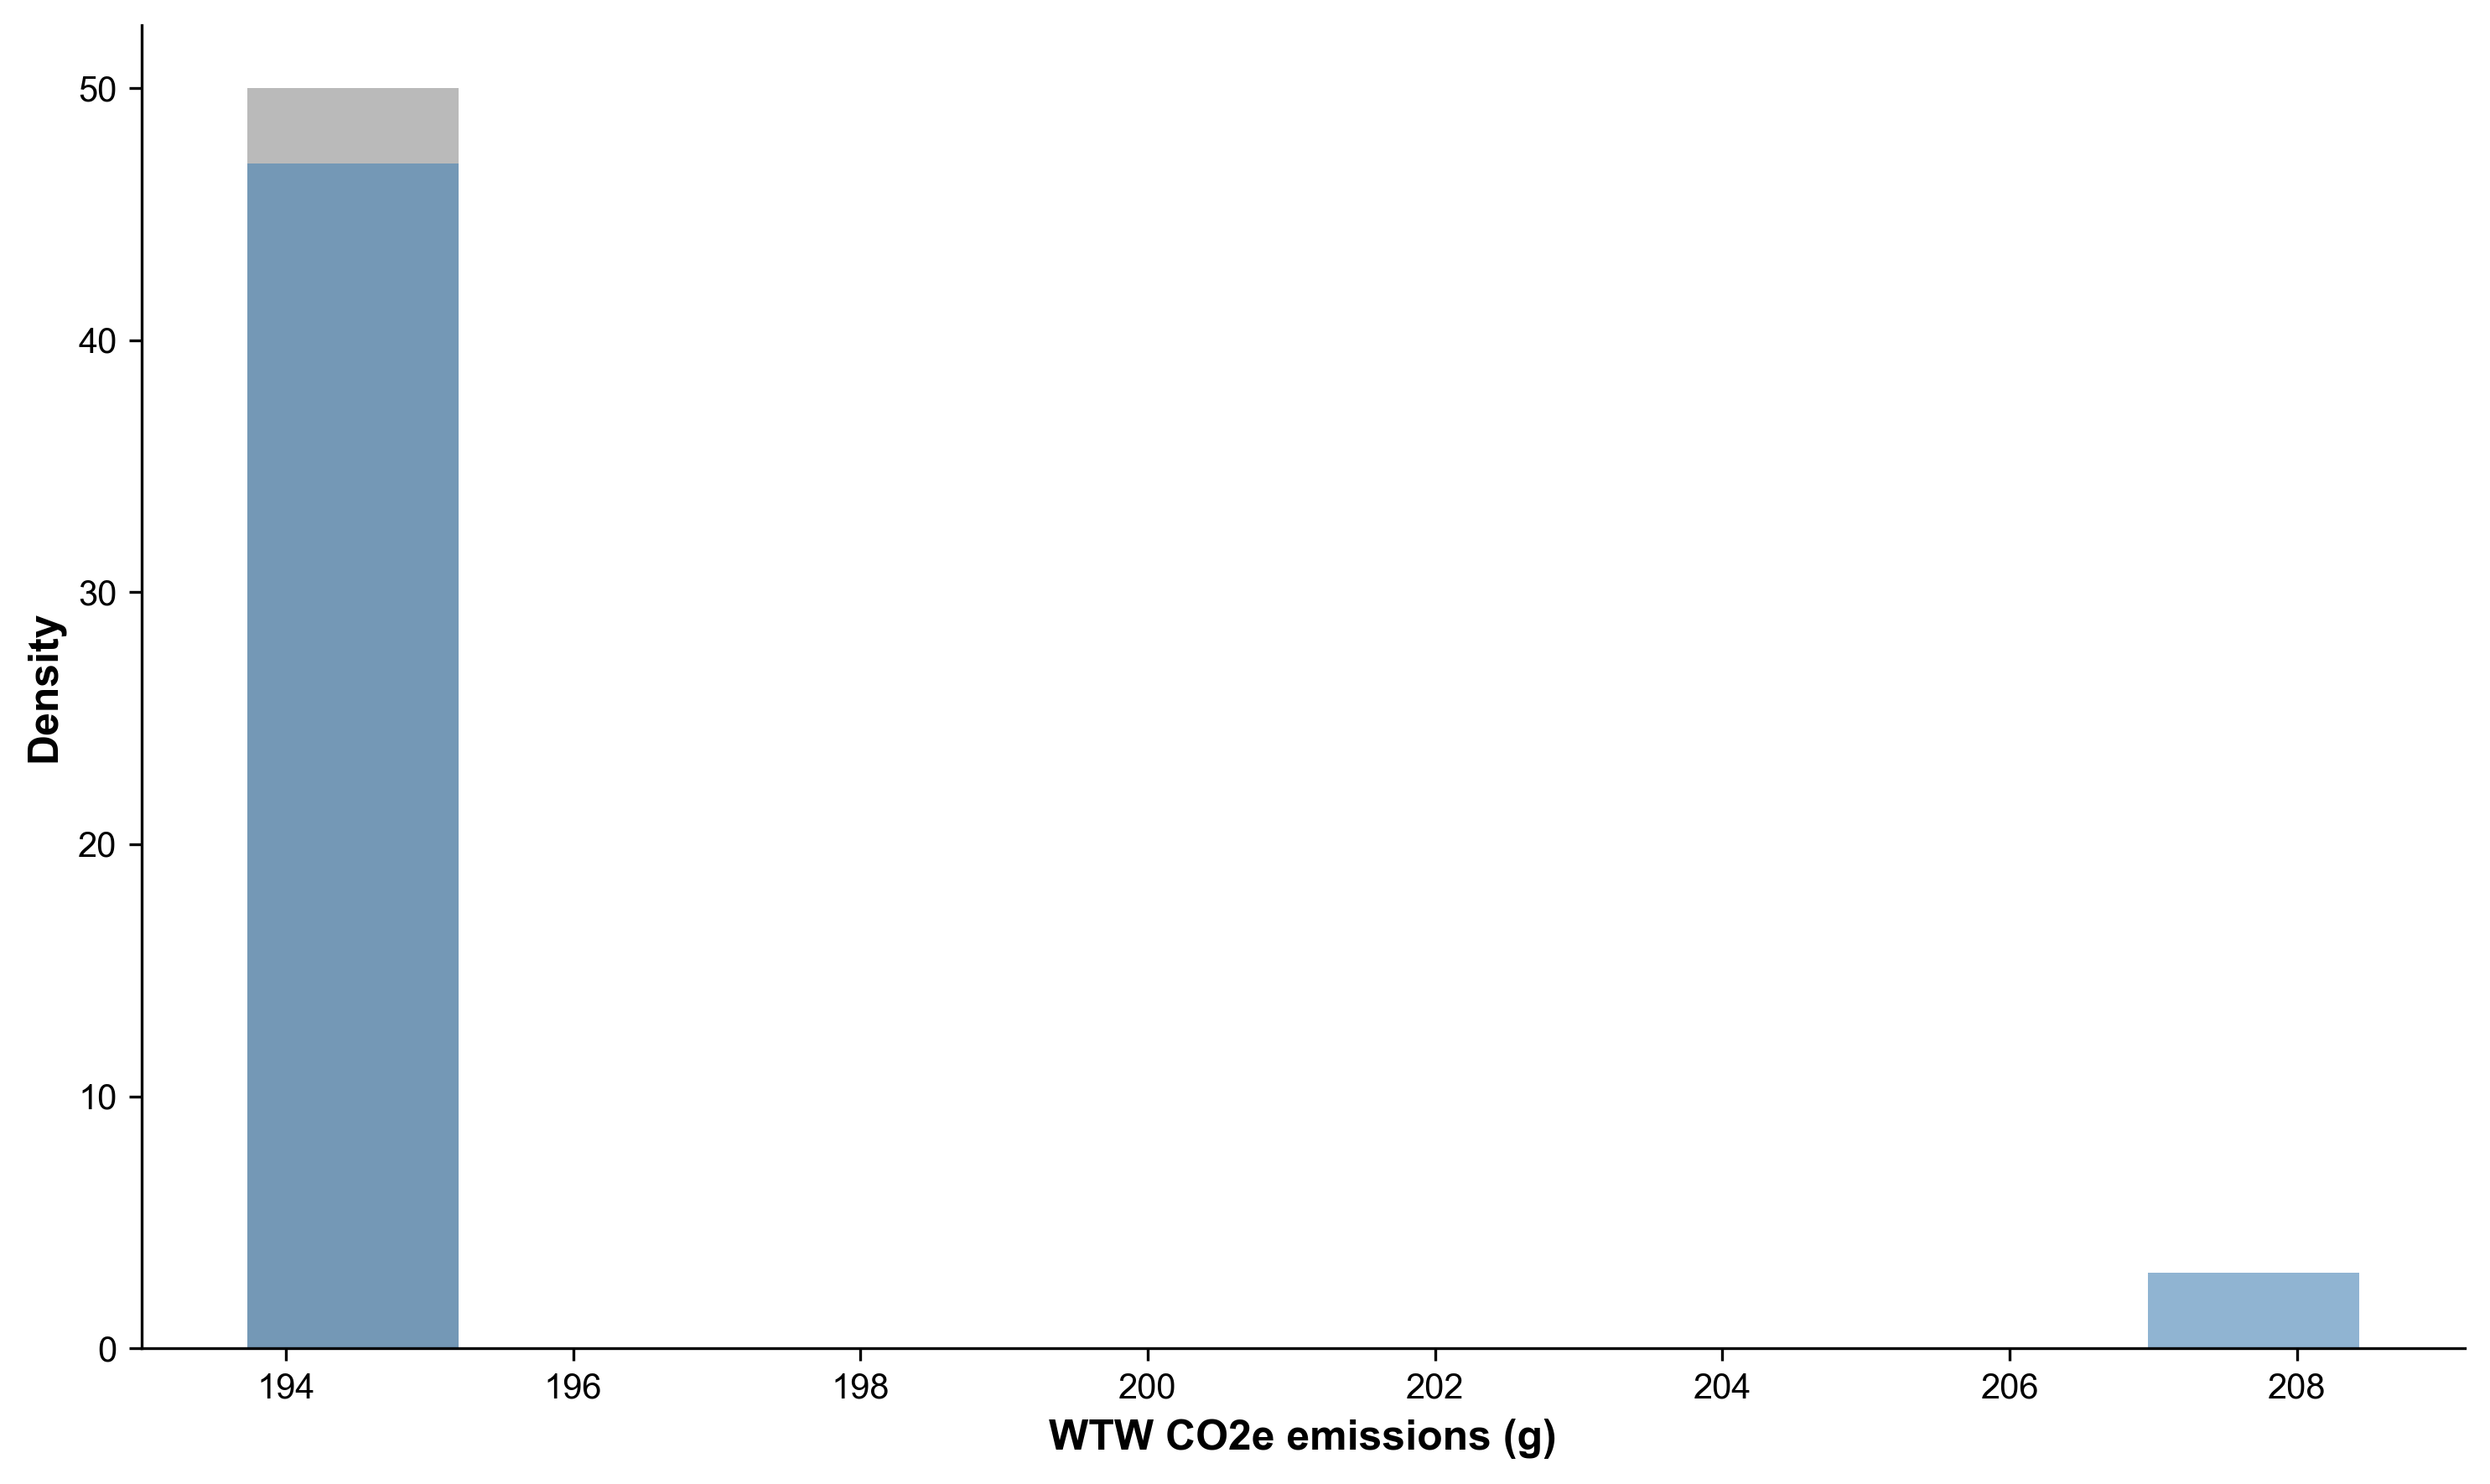

In [24]:
metric = pollutants.CO2e
plot_stat_comparison_two_groups(
    no_policy_summary=np.array(all_scenario_emissions['basic'][metric]),
    car_summary=np.array(all_scenario_emissions['van'][metric]),
    xlabel='WTW CO2e emissions (g)',
)

### Air quality

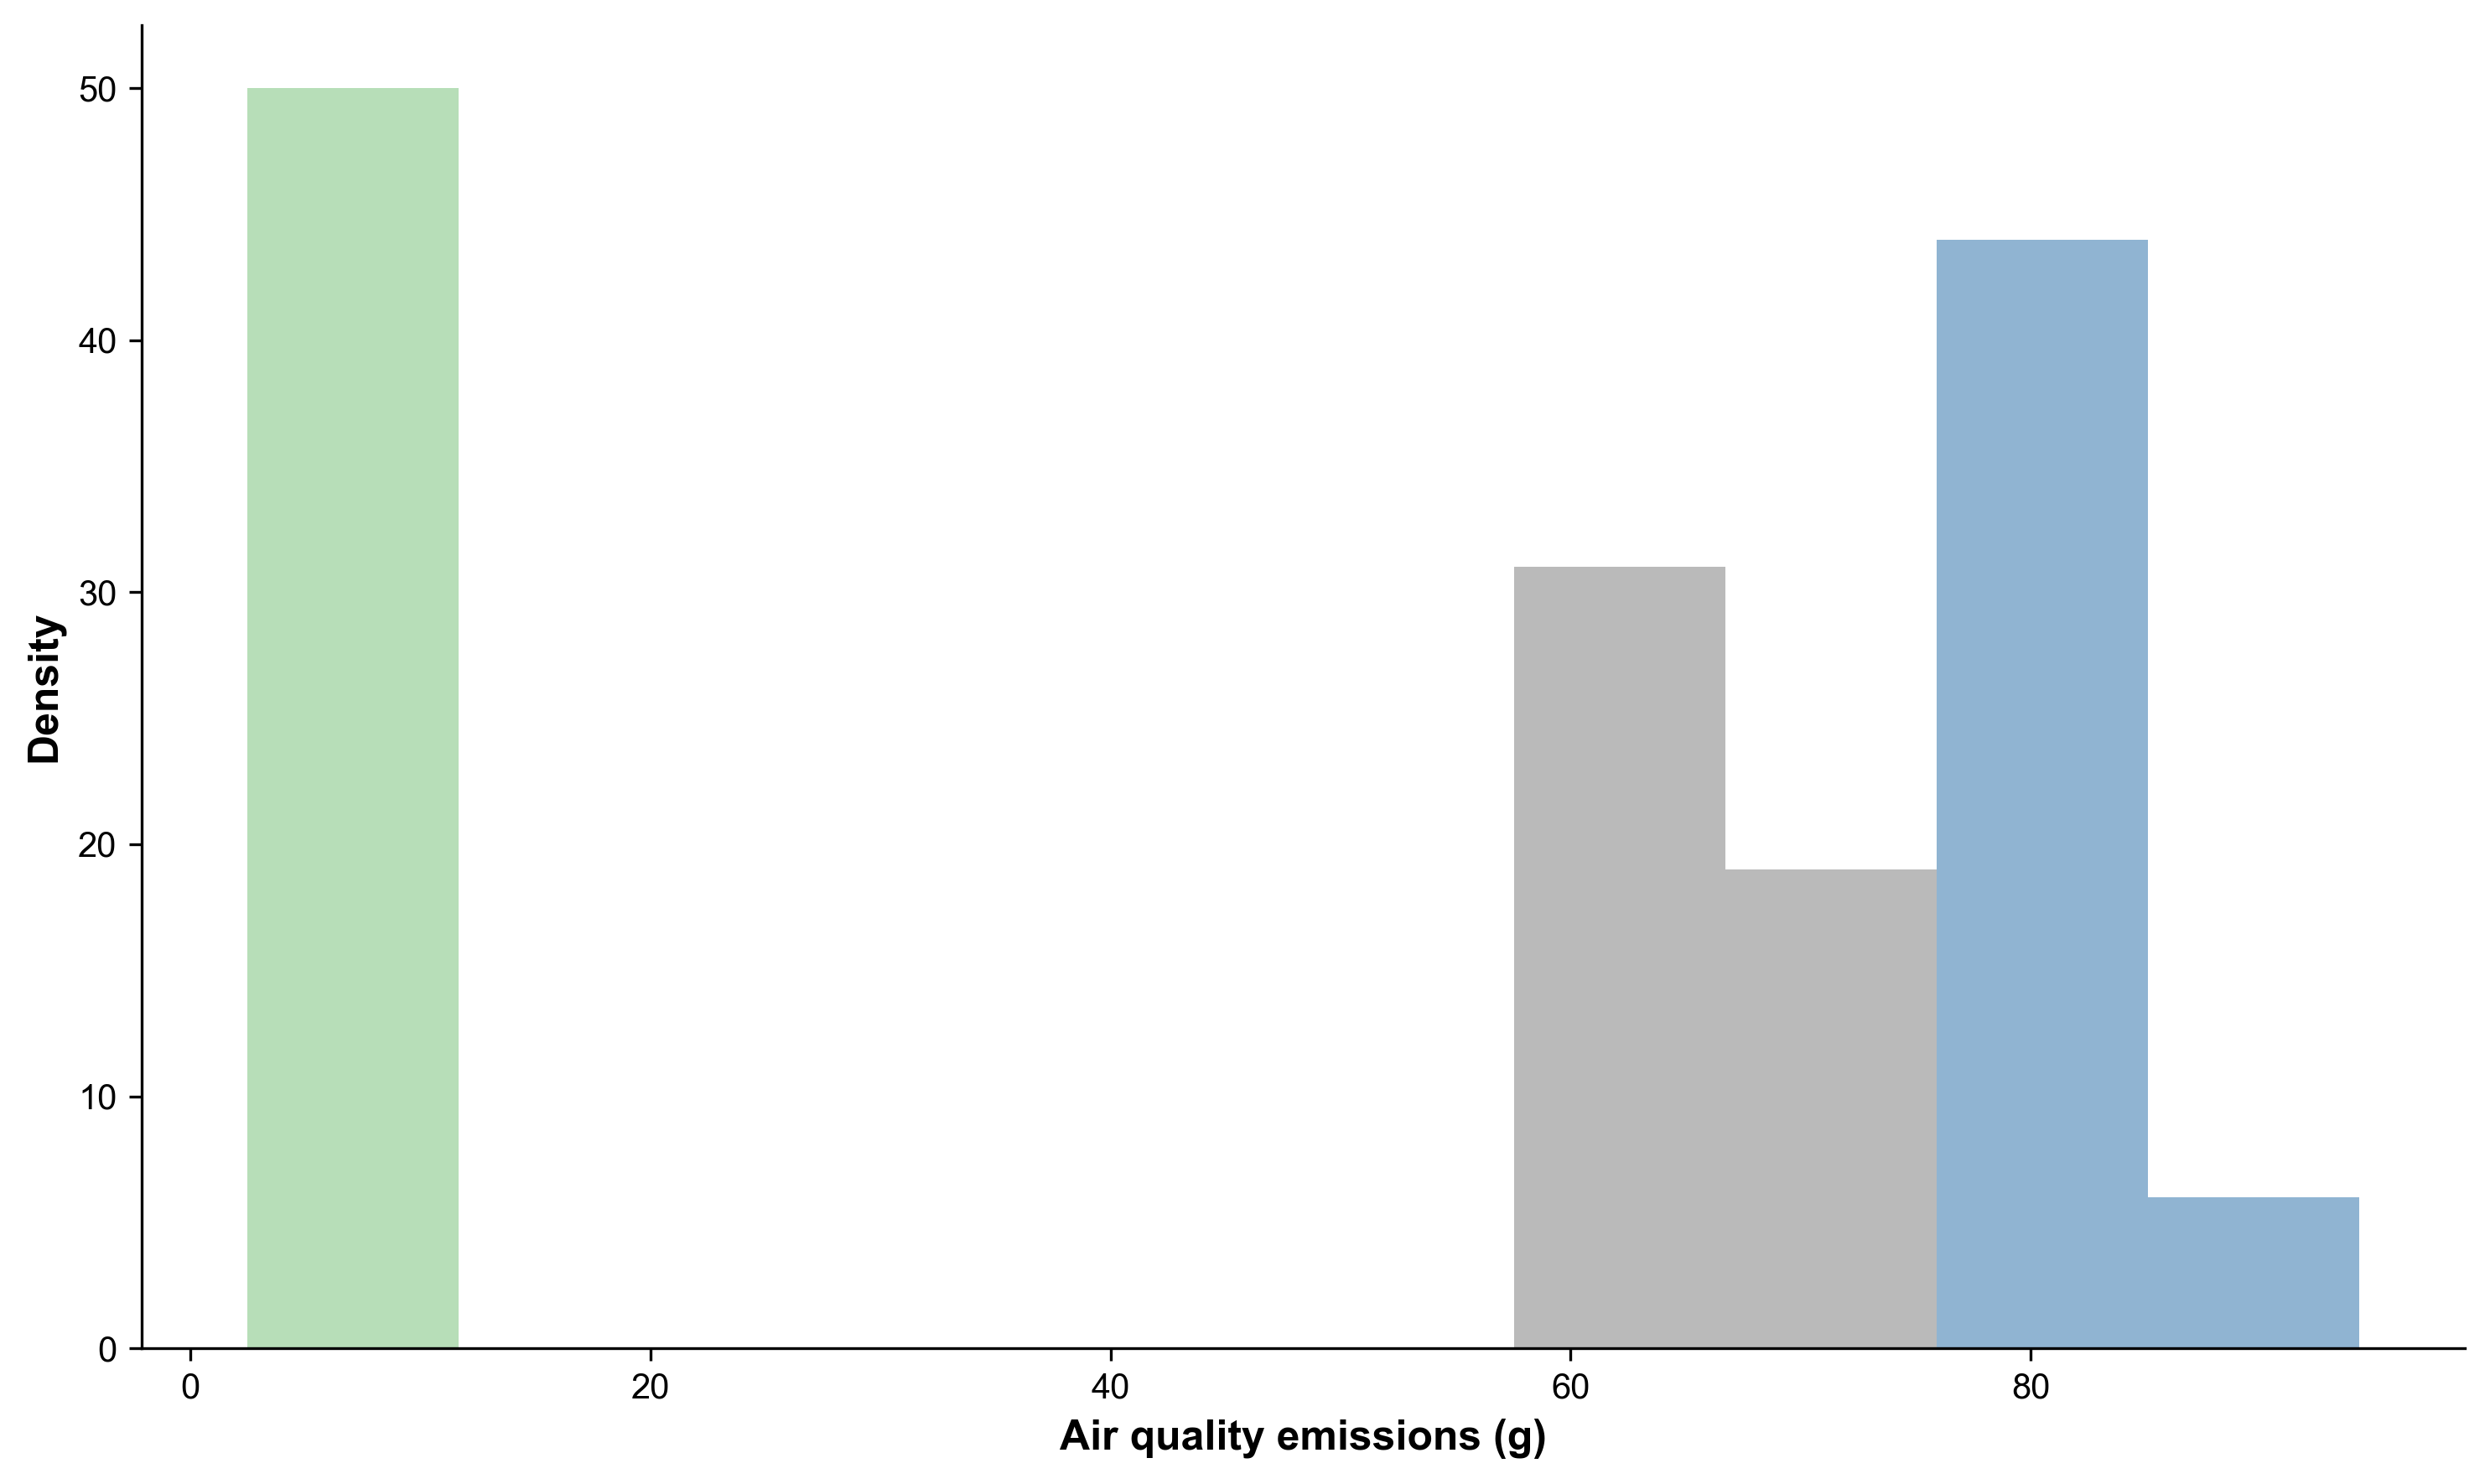

In [25]:
metric = 'air_quality_pollutants'
plot_stat_comparison(
    no_policy_summary=np.array(all_scenario_emissions['basic'][metric]),
    car_summary=np.array(all_scenario_emissions['van'][metric]),
    bike_summary=np.array(all_scenario_emissions['cb'][metric]),
    xlabel='Air quality emissions (g)',
)

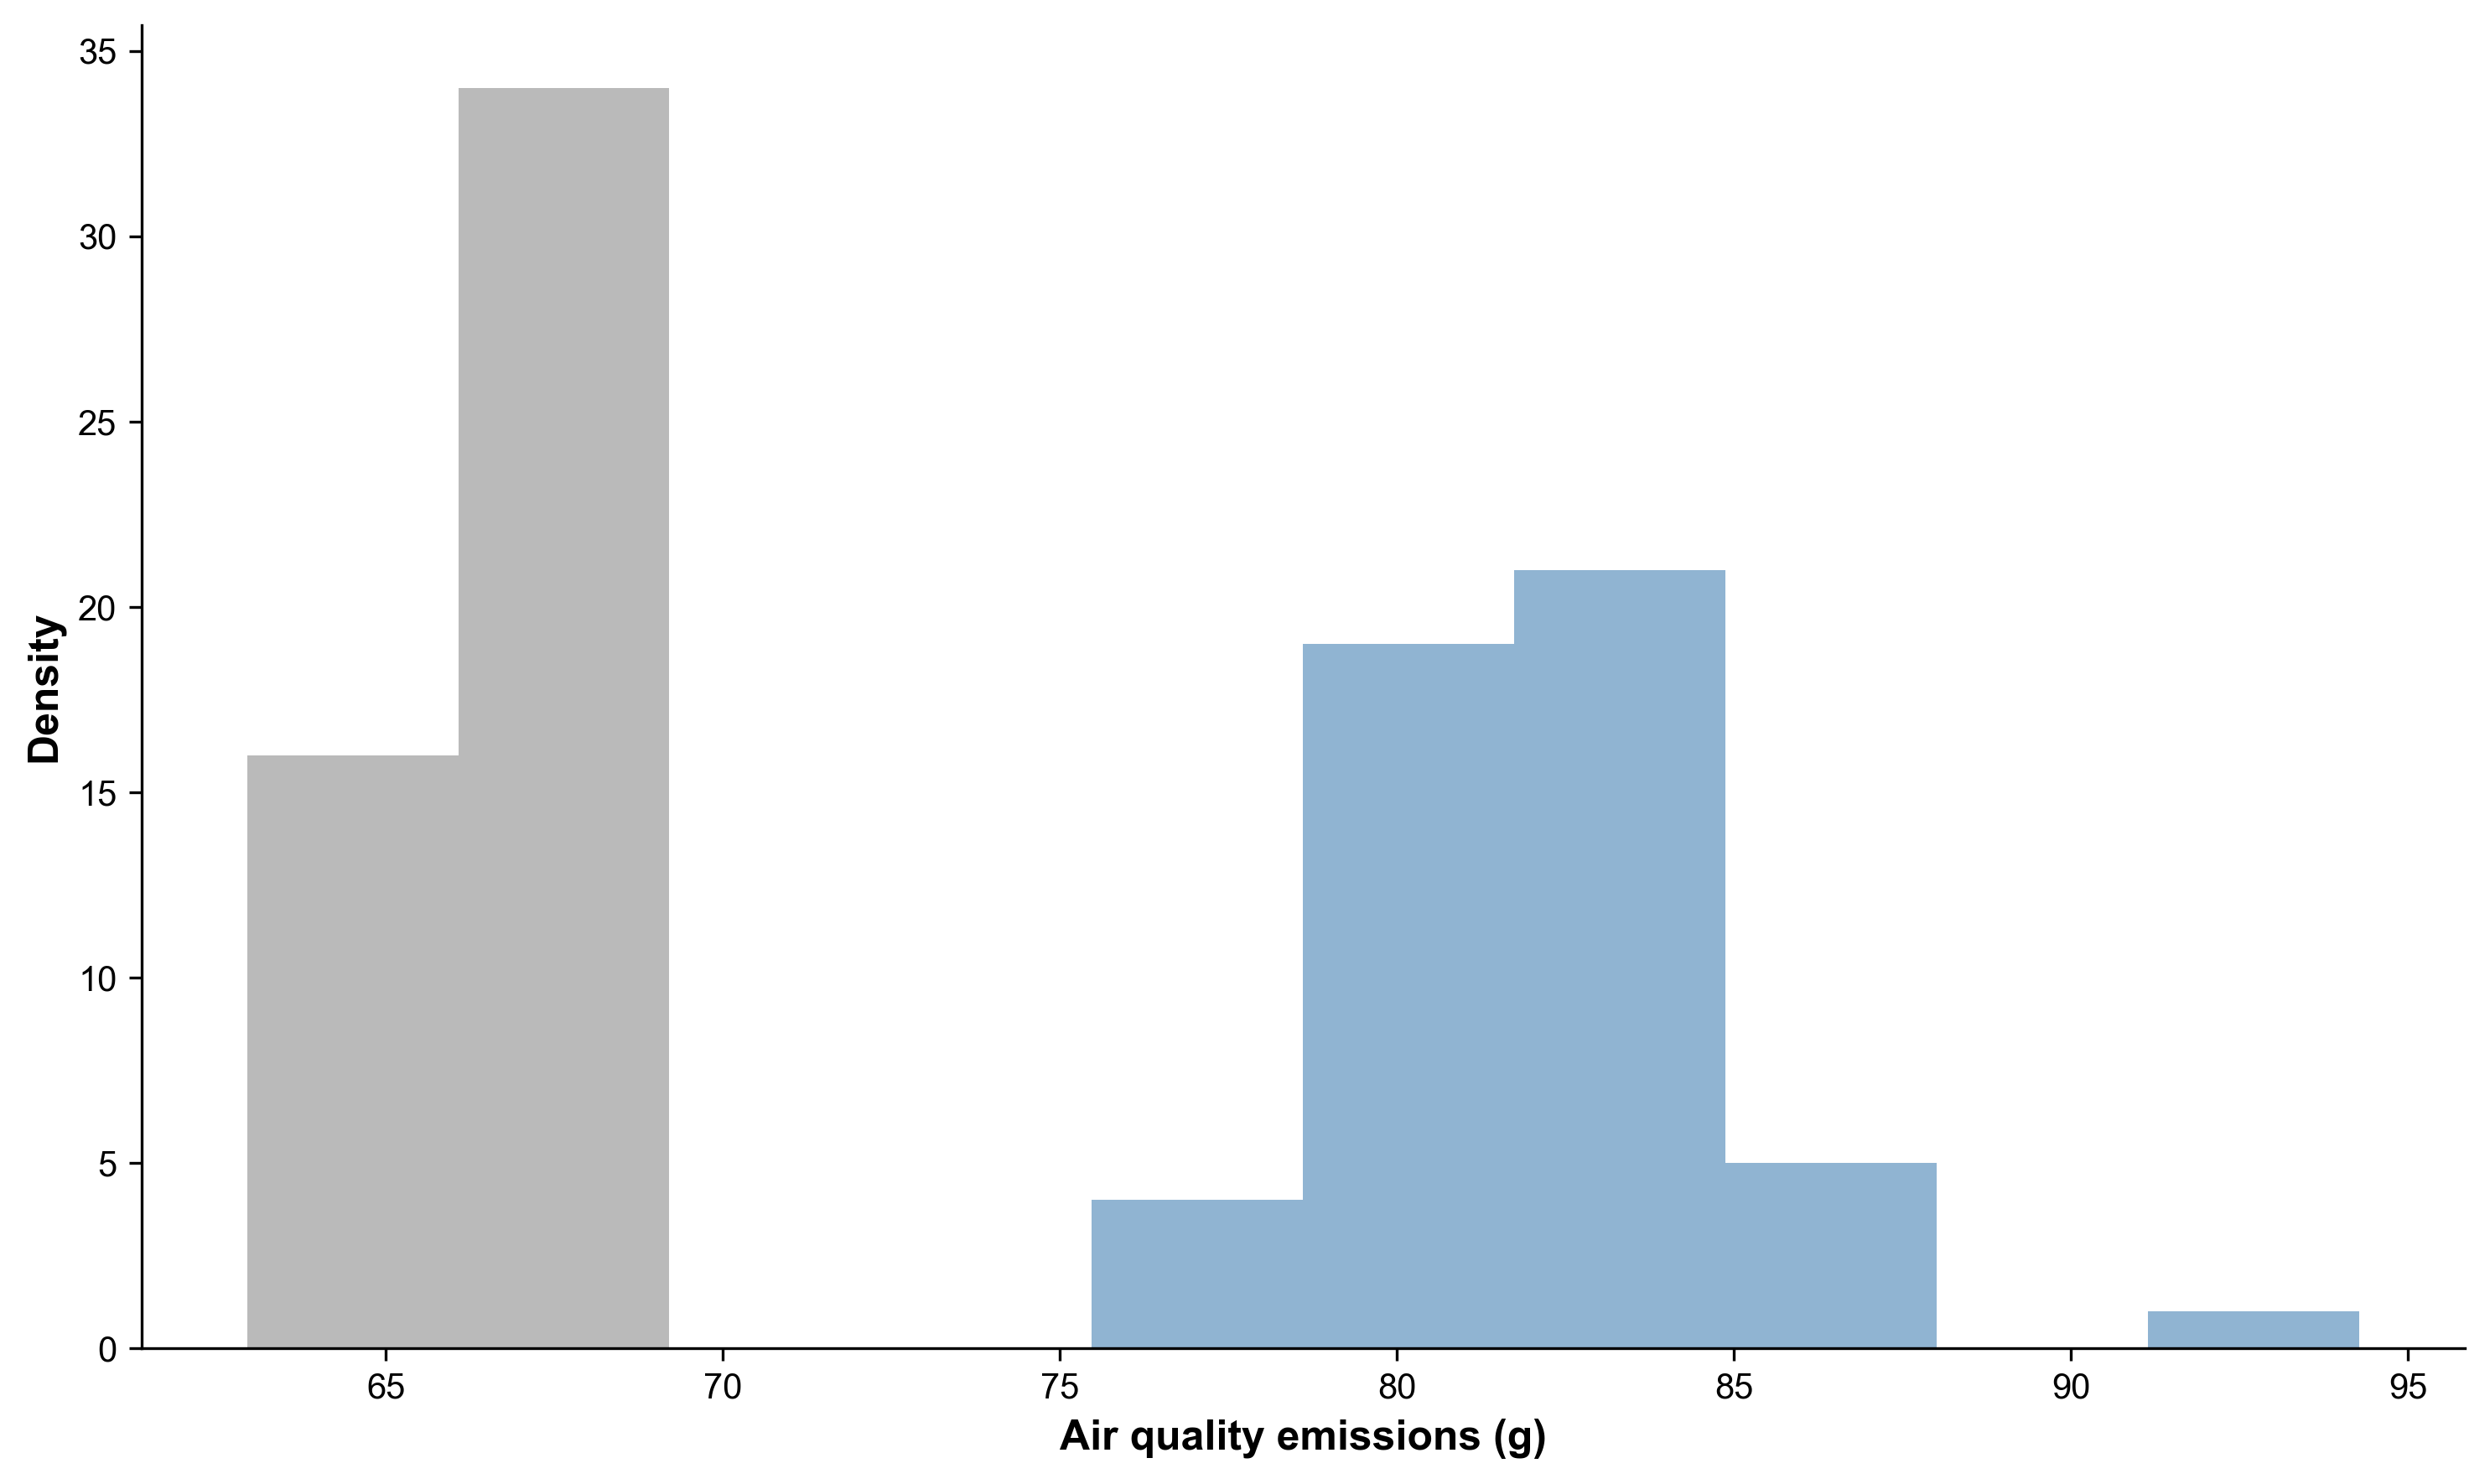

In [26]:
metric = 'air_quality_pollutants'
plot_stat_comparison_two_groups(
    no_policy_summary=np.array(all_scenario_emissions['basic'][metric]),
    car_summary=np.array(all_scenario_emissions['van'][metric]),
    xlabel='Air quality emissions (g)',
)

# Spatial analysis

## Path

In [33]:
scenario_type = 'Basic'
iter_index = 100
events_output_dir = r'../../../../data/intermediate/test/freightEmissions/scenario' + scenario_type + '/iter'+ str(iter_index) + '/outputs/'

## Road Network

In [77]:
scenario_network = matsim.read_network(events_output_dir + 'output_network.xml.gz')
scenario_network

In [78]:
scenario_network_gdf = scenario_network.as_geo(projection='EPSG:31370')
scenario_network_gdf.head()

/opt/anaconda3/envs/TransAndGeoMac/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,length,freespeed,capacity,permlanes,oneway,modes,link_id,from_node,to_node,geometry
0,7.221720,13.888889,1277.777778,2.0,1,"bike,car",100006229_1-1085376891_0,453075429,453075431,"LINESTRING (175094.462 171579.032, 175087.718 ..."
1,7.924752,13.888889,1277.777778,2.0,1,"bike,car",100006230_1-1085376884_0,1472593946,1156261854,"LINESTRING (175094.956 171547.998, 175102.682 ..."
2,8.518773,13.888889,1277.777778,2.0,1,"bike,car",100006231_0-1085376890_0,1156261856,453075428,"LINESTRING (175114.241 171571.774, 175106.042 ..."
3,50.128561,33.333333,2666.666667,3.5,1,"bike,car",100010104_0,1156293852,1156293879,"LINESTRING (174065.630 177001.873, 174056.230 ..."
4,14.524426,33.333333,2666.666667,3.5,1,"bike,car",100010104_1,1156293879,1156293875,"LINESTRING (174056.230 177051.111, 174070.620 ..."


## Emissions events

In [34]:
emissions_events_df = emission_anls.read_freight_emission_data(events_output_dir)
emissions_events_df

,vehicleId,PM2_5,NH3,time,CH4,PM,BC_exhaust,NMHC,CO2_rep,PM_non_exhaust,...,PN,linkId,SO2,CO2_TOTAL,N2O,NO2,Pb,CO,NOx,CO2e
0,freight_carrier_0_veh_carrier0_Van_1_1,0.0,NaN,0.0,0.232077,0.000000,0.0,4.010652,154.470078,NaN,...,0.000000e+00,893781380_r_0-48247088_0,0.000779,161.471848,NaN,0.015243,0.0,29.526291,0.304852,193.729813
41,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.000322,43.0,0.000044,0.000008,NaN,0.000065,2.332949,0.000435,...,1.394500e+09,48247088_1,0.000012,2.438696,0.000014,0.000023,0.0,0.007361,0.000453,NaN
42,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.000662,47.0,0.000090,0.000017,NaN,0.000134,4.789018,0.000892,...,2.862594e+09,48247088_2,0.000024,5.006093,0.000029,0.000046,0.0,0.015111,0.000930,NaN
43,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.000254,49.0,0.000034,0.000007,NaN,0.000052,1.835300,0.000342,...,1.097034e+09,48247088_3,0.000009,1.918489,0.000011,0.000018,0.0,0.005791,0.000356,NaN
44,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.000782,53.0,0.000080,0.000015,NaN,0.000120,5.148313,0.000783,...,2.664827e+09,3343973_r_8,0.000026,5.381673,0.000035,0.000051,0.0,0.014514,0.001026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.000773,23918.0,0.000079,0.000015,NaN,0.000119,5.093302,0.000774,...,2.636353e+09,893781381_1,0.000026,5.324169,0.000034,0.000051,0.0,0.014359,0.001015,NaN
2428,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.003135,23933.0,0.000321,0.000061,NaN,0.000482,20.646122,0.003138,...,1.068667e+10,48247088_r_3-893781380_0,0.000104,21.581962,0.000139,0.000206,0.0,0.058207,0.004114,NaN
2429,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.001202,23938.0,0.000123,0.000023,NaN,0.000185,7.915867,0.001203,...,4.097345e+09,1052635307_r_0,0.000040,8.274675,0.000053,0.000079,0.0,0.022317,0.001577,NaN
2431,freight_carrier_0_veh_carrier0_Van_1_1,0.0,0.001202,24036.0,0.000123,0.000023,NaN,0.000185,7.915867,0.001203,...,4.097345e+09,1052635307_2,0.000040,8.274675,0.000053,0.000079,0.0,0.022317,0.001577,NaN


In [48]:
emissions_on_link_by_type_dict = emission_anls.get_all_pollutants_by_link_dict(emissions_events_df)
emissions_on_link_by_type_dict

{'HC': type                                       coldEmissionEvent  \
 linkId                                                         
 100344071_r_0                                            0.0   
 100344071_r_1                                            0.0   
 100490507_r_0-100490507_r_1-100490507_r_2                0.0   
 100490507_r_3                                            0.0   
 100490507_r_4-100490507_r_5                              0.0   
 ...                                                      ...   
 99500157_r_1-99500157_r_2                                0.0   
 99583853_1                                               0.0   
 99583853_2                                               0.0   
 splitLink_318206403_r_0_1                                0.0   
 splitLink_318206403_r_0_2                                0.0   
 
 type                                       warmEmissionEvent       sum  
 linkId                                                                  

In [73]:
emissions_on_link_by_type_dict.keys()

dict_keys(['HC', 'Benzene', 'PM2_5', 'PN', 'NH3', 'SO2', 'CO2_TOTAL', 'N2O', 'CH4', 'NO2', 'PM', 'Pb', 'BC_exhaust', 'PM2_5_non_exhaust', 'CO', 'NMHC', 'CO2_rep', 'PM_non_exhaust', 'NOx', 'BC_non_exhaust', 'CO2e', 'FC', 'FC_MJ'])

In [79]:
for pollutant, emissions_on_link_df in emissions_on_link_by_type_dict.items():
    if emissions_on_link_df is None:
        print('No emissions for pollutant:', pollutant)
        continue
    _emission_df = emissions_on_link_df.reset_index()[['linkId', 'sum']]
    _emission_df.columns = ['link_id', pollutant]
    # _emission_df['linkId'] = _emission_df['linkId'].astype(str)
    scenario_network_gdf = pd.merge(scenario_network_gdf, _emission_df, how='left', on='link_id')

No emissions for pollutant: PM2_5_non_exhaust
No emissions for pollutant: BC_non_exhaust


In [81]:
scenario_network_gdf.head()

,length,freespeed,capacity,permlanes,oneway,modes,link_id,from_node,to_node,geometry,...,Pb,BC_exhaust,CO,NMHC,CO2_rep,PM_non_exhaust,NOx,CO2e,FC,FC_MJ
0,7.221720,13.888889,1277.777778,2.0,1,"bike,car",100006229_1-1085376891_0,453075429,453075431,"LINESTRING (175094.462 171579.032, 175087.718 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.924752,13.888889,1277.777778,2.0,1,"bike,car",100006230_1-1085376884_0,1472593946,1156261854,"LINESTRING (175094.956 171547.998, 175102.682 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.518773,13.888889,1277.777778,2.0,1,"bike,car",100006231_0-1085376890_0,1156261856,453075428,"LINESTRING (175114.241 171571.774, 175106.042 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.128561,33.333333,2666.666667,3.5,1,"bike,car",100010104_0,1156293852,1156293879,"LINESTRING (174065.630 177001.873, 174056.230 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.524426,33.333333,2666.666667,3.5,1,"bike,car",100010104_1,1156293879,1156293875,"LINESTRING (174056.230 177051.111, 174070.620 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Sum air quality pollutants
scenario_network_gdf['air_quality_pollutants'] = 0
for pollutant in pollutants.AIR_QUALITY_POLLUTANTS:
    if pollutant in scenario_network_gdf.columns:
        scenario_network_gdf['air_quality_pollutants'] += scenario_network_gdf[pollutant]
    else:
        print('No pollutant:', pollutant)


No pollutant: PM2_5_non_exhaust


In [88]:
scenario_network_gdf.head()

,length,freespeed,capacity,permlanes,oneway,modes,link_id,from_node,to_node,geometry,...,BC_exhaust,CO,NMHC,CO2_rep,PM_non_exhaust,NOx,CO2e,FC,FC_MJ,air_quality_pollutants
0,7.221720,13.888889,1277.777778,2.0,1,"bike,car",100006229_1-1085376891_0,453075429,453075431,"LINESTRING (175094.462 171579.032, 175087.718 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.924752,13.888889,1277.777778,2.0,1,"bike,car",100006230_1-1085376884_0,1472593946,1156261854,"LINESTRING (175094.956 171547.998, 175102.682 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.518773,13.888889,1277.777778,2.0,1,"bike,car",100006231_0-1085376890_0,1156261856,453075428,"LINESTRING (175114.241 171571.774, 175106.042 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.128561,33.333333,2666.666667,3.5,1,"bike,car",100010104_0,1156293852,1156293879,"LINESTRING (174065.630 177001.873, 174056.230 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.524426,33.333333,2666.666667,3.5,1,"bike,car",100010104_1,1156293879,1156293875,"LINESTRING (174056.230 177051.111, 174070.620 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
scenario_network_gdf.columns

Index(['length', 'freespeed', 'capacity', 'permlanes', 'oneway', 'modes',
       'link_id', 'from_node', 'to_node', 'geometry', 'HC', 'Benzene', 'PM2_5',
       'PN', 'NH3', 'SO2', 'CO2_TOTAL', 'N2O', 'CH4', 'NO2', 'PM', 'Pb',
       'BC_exhaust', 'CO', 'NMHC', 'CO2_rep', 'PM_non_exhaust', 'NOx', 'CO2e',
       'FC', 'FC_MJ', 'air_quality_pollutants'],
      dtype='object')

# Test

In [4]:
cn_300_roads = pd.read_csv(r'300_roads.csv')
cn_300_roads

,Unnamed: 0,id,name,province,city,wgs84_lng,wgs84_lat,index_right,省级,地级,地名,length,density,c_density,density_r,city_dens,city_den_r
0,0,5,特来电充电站(鱼卡北侧服务区),青海省,海西蒙古族藏族自治州,95.010507,38.035743,93.0,青海省,海西蒙古族藏族自治州,海西蒙古族藏族自治州,0.419121,1.482339,4.365848e-08,3.395305e+07,0.051045,29.040016
1,1,6,国家电网汽车充电站(青海省海西州格尔木市盐桥路加油站),青海省,海西蒙古族藏族自治州,94.883885,36.400831,93.0,青海省,海西蒙古族藏族自治州,海西蒙古族藏族自治州,0.964027,3.409549,1.004195e-07,3.395305e+07,0.051045,66.795371
2,2,7,格尔木派酒店汽车充电站,青海省,海西蒙古族藏族自治州,94.888813,36.416277,93.0,青海省,海西蒙古族藏族自治州,海西蒙古族藏族自治州,0.375029,1.326392,3.906547e-08,3.395305e+07,0.051045,25.984916
3,3,8,国家电网汽车充电站(青海省海西州格尔木市交通巷加油站),青海省,海西蒙古族藏族自治州,94.896052,36.390956,93.0,青海省,海西蒙古族藏族自治州,海西蒙古族藏族自治州,0.102728,0.363327,1.070085e-08,3.395305e+07,0.051045,7.117813
4,4,9,国家电网汽车充电站(青海省海西州格尔木市海西停车场),青海省,海西蒙古族藏族自治州,94.889911,36.391887,93.0,青海省,海西蒙古族藏族自治州,海西蒙古族藏族自治州,0.097133,0.343538,1.011803e-08,3.395305e+07,0.051045,6.730142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90857,90857,159790,星星充电汽车充电站(星星充电金煦),天津市,天津市,117.185250,39.085443,264.0,天津市,不统计,天津市,0.685087,2.422999,7.136320e-08,3.395305e+07,2.698515,0.897901
90858,90858,159791,立牌共享充电站(面爸面妈),天津市,天津市,117.195086,39.137146,264.0,天津市,不统计,天津市,2.560721,9.056697,2.667417e-07,3.395305e+07,2.698515,3.356178
90859,90859,159792,特斯拉超级充电站(天津万象城),天津市,天津市,117.206653,39.088661,264.0,天津市,不统计,天津市,0.578024,2.044341,6.021082e-08,3.395305e+07,2.698515,0.757580
90860,90860,159793,小桔充电汽车充电站(天津南开上谷商业街充电站),天津市,天津市,117.168720,39.090274,264.0,天津市,不统计,天津市,0.759748,2.687060,7.914046e-08,3.395305e+07,2.698515,0.995755


In [8]:
cn_city_road = cn_300_roads.groupby(['省级', '地名'])['city_den_r'].agg('mean').reset_index()
cn_city_road

,省级,地名,city_den_r
0,上海市,上海市,0.720402
1,云南省,临沧市,4.222015
2,云南省,丽江市,11.844097
3,云南省,保山市,3.233338
4,云南省,大理白族自治州,5.027212
...,...,...,...
344,黑龙江省,大庆市,5.206762
345,黑龙江省,牡丹江市,8.503283
346,黑龙江省,绥化市,5.339964
347,黑龙江省,鸡西市,2.916790


{'whiskers': [<matplotlib.lines.Line2D at 0x306810160>,
 'caps': [<matplotlib.lines.Line2D at 0x306810190>,
 'boxes': [<matplotlib.lines.Line2D at 0x306812410>],
 'medians': [<matplotlib.lines.Line2D at 0x304edb9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x304ed85e0>],
 'means': []}

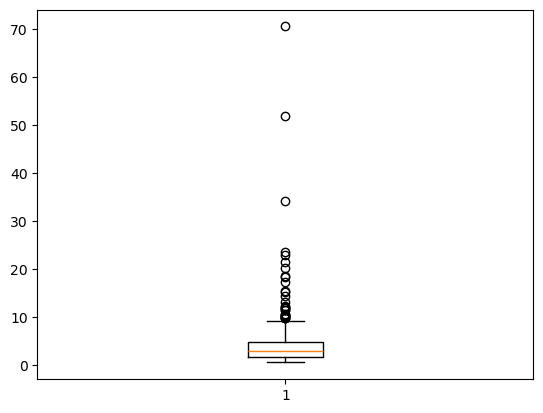

In [9]:
plt.boxplot(cn_city_road['city_den_r'])